# Global Power Plant Database

### Problem Statement:
Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### Key attributes of the database
The database includes the following indicators:
- country (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
- country_long (text): longer form of the country designation
- name (text): name or title of the power plant, generally in Romanized form
- gppd_idnr (text): 10 or 12 character identifier for the power plant
- capacity_mw (number): electrical generating capacity in megawatts
- latitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- longitude (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
- primary_fuel (text): energy source used in primary electricity generation or export
- other_fuel1 (text): energy source used in electricity generation or export
- other_fuel2 (text): energy source used in electricity generation or export
- other_fuel3` (text): energy source used in electricity generation or export
- commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
- owner (text): majority shareholder of the power plant, generally in Romanized form
- source (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
- url (text): web document corresponding to the source field
- geolocation_source (text): attribution for geolocation information
- wepp_id (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
- year_of_capacity_data (number): year the capacity information was reported
- generation_gwh_2013 (number): electricity generation in gigawatt-hours reported for the year 2013
- generation_gwh_2014 (number): electricity generation in gigawatt-hours reported for the year 2014
- generation_gwh_2015 (number): electricity generation in gigawatt-hours reported for the year 2015
- generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
- generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
- generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
- generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
- generation_data_source` (text): attribution for the reported generation information
- estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
- estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014
- estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015
- estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016
- estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017
- estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
- estimated_generation_note_2014 (text): label of the model/method used to estimate generation for the year 2014
- estimated_generation_note_2015 (text): label of the model/method used to estimate generation for the year 2015
- estimated_generation_note_2016 (text): label of the model/method used to estimate generation for the year 2016
- estimated_generation_note_2017 (text): label of the model/method used to estimate generation for the year 2017

### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories.

##### Prediction : Make two prediction 1) Primary Fuel 2) capacity_mw

In [1]:
#Importing required libraries.

import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#importing train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#importing Machine Learning models
import sklearn
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We can see that our dataset has a total of 907 rows and 27 columns.

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


- Here we will check the first five rows of our entire dataset. Found that there are many NaN values.

In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- When we checked the last five rows of our dataset, we can see that there are NaN values in our dataset.

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(907, 27)

- By looking at the column 'country' we can say that it is similar and short form of column name 'country_long'
- We can see that our dataset has 27 columns out of which 2 columns are our target variables and remaining 25 are the features.

##### This project defines the "Fuel Type" attribute of our database based on common fuel categories and "Megawatts Capacity" based on electrical generating capacity in megawatts.

# 1: "primary_fuel" is a target variable 
# 2: "capacity_mw" is also a target variable

In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
#let us chek the datatypes of our columns

df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

- We can see that our dataset is having 12 object data types and 15 numerical data types.

In [8]:
# Lets check number of unique values of each columns:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

- As per above observations, we can see that coloumns with No unique values are "other_fuel3, weep_id, generation_gwh_2013,generation_gwh_2019, estimated_generation_gwh, as there is no data we can drop this columns.

- Similarly columns with only single unique values are "country, country_long, other_fuel2, year_of_capacity_data, generation_data_source", we will need to check this columns and then work on it.

In [9]:
# Lets check if there are ay duplicate values in our dataset
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
902    False
903    False
904    False
905    False
906    False
Length: 907, dtype: bool

In [10]:
#Exploring the data of target variable:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [11]:
#Exploring the data of target variable:
df.capacity_mw.value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

# Checking unique values of all columns:

In [12]:
df['country'].unique()

array(['IND'], dtype=object)

In [13]:
df['country_long'].unique()

array(['India'], dtype=object)

In [14]:
df['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [15]:
df['gppd_idnr'].unique()

array(['WRI1020239', 'WRI1019881', 'WRI1026669', 'IND0000001',
       'IND0000002', 'IND0000003', 'IND0000004', 'IND0000005',
       'IND0000006', 'IND0000007', 'IND0000008', 'IND0000009',
       'IND0000010', 'IND0000011', 'IND0000012', 'IND0000013',
       'IND0000014', 'WRI1019996', 'IND0000015', 'WRI1019938',
       'WRI1019939', 'WRI1019904', 'IND0000016', 'IND0000017',
       'WRI1019940', 'WRI1020238', 'WRI1026104', 'WRI1026069',
       'WRI1026105', 'WRI1026768', 'WRI1026347', 'WRI1026068',
       'WRI1026106', 'WRI1026107', 'WRI1026108', 'WRI1026109',
       'WRI1026110', 'WRI1026111', 'WRI1026112', 'IND0000019',
       'WRI1019905', 'IND0000020', 'IND0000021', 'IND0000022',
       'IND0000023', 'IND0000025', 'IND0000024', 'WRI1019941',
       'WRI1019882', 'IND0000026', 'IND0000027', 'IND0000028',
       'IND0000029', 'IND0000030', 'IND0000031', 'IND0000032',
       'WRI1019883', 'IND0000033', 'IND0000034', 'IND0000035',
       'IND0000036', 'IND0000037', 'IND0000038', 'IND00

In [16]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02, 1.05000e+03,
       5.10000e+02, 6.75000e+01, 3.00000e+02, 3.35000e+02, 1.20000e+01,
       3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01, 7.20000e+02,
       9.00000e+01, 1.32000e+03, 1.20000e+02, 6.60000e+01, 2.70000e+02,
       2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01, 1.70000e+03,
       2.60000e+01, 4.10000e+01, 1.37900e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 7.50000e+02, 4.00000e+01, 1.650

In [17]:
df['latitude'].unique()

array([28.1839, 24.7663, 21.9038, 23.8712, 21.9603, 23.7689, 10.4547,
       32.2258, 16.33  , 23.1642, 21.0782, 31.2717, 24.2007, 31.2412,
           nan, 24.201 , 25.1797, 23.0666, 23.0655, 18.0845, 19.5867,
       16.7708, 26.6282, 21.7438, 19.7881, 28.3615, 14.5751, 14.9455,
       18.858 , 10.7245, 14.4791, 27.3473, 27.36  , 27.3632, 27.3661,
       27.3537, 27.3504, 27.3566, 28.506 , 16.2804, 33.1815, 32.8063,
       23.8285, 18.1396, 19.8601, 24.6929, 22.3421, 22.9956, 32.1686,
       24.1917, 24.223 , 23.6026, 21.9114, 23.807 , 25.3999, 22.9417,
       25.4865, 28.4723, 27.8453, 13.1021, 31.4306, 31.9546, 17.3816,
       20.805 , 16.6505, 16.2774, 15.1831, 15.1777, 15.1932, 13.7008,
       13.8274, 31.4107, 21.232 , 21.0813, 19.5555, 18.1012, 19.5132,
       21.5837, 11.331 , 11.2428, 11.3842, 18.2416, 21.184 , 18.455 ,
       18.4426, 18.9368, 21.0483, 25.2267, 24.2508, 23.3172, 24.8263,
       22.0103, 32.1121, 23.3256, 23.6783, 23.785 , 26.5145, 21.2083,
        9.9975, 10.0

In [18]:
df['longitude'].unique()

array([73.2407, 74.609 , 69.3732, 91.3602, 82.4091, 68.6447, 77.0078,
       77.207 , 75.8863, 81.6373, 77.9009, 76.4938, 82.8   , 77.8769,
           nan, 82.7891, 76.3188, 81.7841, 81.7865, 76.1851, 74.7061,
       74.9191, 79.5286, 83.2741, 79.1518, 74.2402, 76.3926, 77.687 ,
       73.6396, 77.1893, 76.3482, 71.6917, 71.6918, 71.6916, 77.3066,
       75.225 , 75.3155, 76.1418, 87.4513, 82.1221, 79.3421, 74.689 ,
       82.4305, 88.4042, 76.4695, 81.2875, 81.2747, 74.2562, 83.1889,
       91.565 , 86.0218, 79.925 , 85.7452, 79.8066, 73.2   , 80.2682,
       78.241 , 76.7986, 74.5345, 79.0547, 74.8209, 74.7111, 76.7909,
       77.1036, 76.7195, 75.6373, 75.7131, 76.4328, 79.6311, 79.7708,
       73.8087, 73.7252, 73.4173, 72.2222, 77.758 , 77.8659, 77.7145,
       74.7529, 81.4237, 73.3907, 73.3498, 73.4527, 75.8425, 74.6216,
       78.1606, 78.1336, 73.0901, 83.2058, 76.6537, 81.0333, 86.0888,
       85.88  , 90.5287, 74.1543, 76.3744, 88.14  , 76.532 , 78.9535,
       78.9333, 76.1

In [19]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [20]:
df['other_fuel1'].unique()

array([nan, 'Oil', 'Cogeneration', 'Gas'], dtype=object)

In [21]:
df['other_fuel2'].unique()

array([nan, 'Oil'], dtype=object)

In [22]:
df['other_fuel3'].unique()

array([nan])

In [23]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [24]:
df['owner'].unique()

array(['Solar Paces', 'Ultratech Cement ltd', 'AES', nan,
       'Hindustan Pvt lt', 'Dr Ssk ltd', 'Ashok Ssk ltd',
       'Shree Sugars ltd', 'Ener-t International Ltd.',
       'Nav Bharat Buildcon Private Limited', 'MEIL Green Power Limited',
       'Madras Cement Limited',
       'DDE Renewable Energy Private Limited (DREPL)',
       'Electromech Maritech Private Limited',
       'Finehope Allied Engineering Private Limited',
       'Khaya Solar Projects Private Limited',
       'Newton Solar Private Limited', 'Saidham Overseas Private Limited',
       'Vasavi Solar Power Private Limited', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Bharat Petroleum Corporation Limited', 'Bhilwara Energy Limited',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Bina

In [25]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [26]:
df['url'].unique()

array(['http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=262',
       'http://www.ultratechcement.com/',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1328700673.83/view',
       'http://www.cea.nic.in/', 'http://www.hindustanpowerprojects.com/',
       'http://www.ambedkarsugar.com/',
       'http://www.mapsofindia.com/whitepages/foods-and-beverages/food-processors-and-manufacturers/ashokssklimited',
       'http://www.renukasugars.com/',
       'http://www.nrel.gov/csp/solarpaces/project_detail.cfm/projectID=254',
       'http://www.navbharatbuildcon.com/windmill--solar-plant.html',
       'https://cdm.unfccc.int/Projects/DB/DNV-CUK1216117082.43/view',
       'http://www.meil.in/power-projects',
       'https://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1348755977.79/view',
       'https://cdm.unfccc.int/Projects/DB/BVQI1379744232.36/viewhttps://cdm.unfccc.int/Projects/DB/LRQA%20Ltd1278588174.29/view',
       'http://www.lancosolar.com/pdfs/rajasthan-pv-project-details.p

In [27]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [28]:
df['wepp_id'].unique()

array([nan])

In [29]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [30]:
df['generation_gwh_2013'].unique()

array([nan])

In [31]:
df['generation_gwh_2014'].unique()

array([           nan, 6.17789264e+02, 3.03555000e+03, 1.15342100e+03,
       1.57558250e+02, 6.74391100e+02, 4.80594950e+02, 1.88790400e+03,
       1.92097100e+03, 6.14412500e+02, 7.74400000e+03, 9.67087900e+03,
       1.61198700e+03, 1.60700000e+03, 0.00000000e+00, 2.93600000e+03,
       2.92521045e+03, 7.92686650e+02, 7.23528100e+03, 1.33253385e+03,
       9.46141000e+02, 1.07595320e+03, 8.56595500e+01, 1.20444750e+02,
       2.65780000e+02, 3.04832800e+02, 4.95967700e+02, 1.22100000e+03,
       5.05760000e+02, 1.25573200e+03, 2.85387000e+00, 1.24631710e+03,
       2.93534950e+02, 5.44576300e+03, 5.03370500e+01, 5.24180925e+03,
       6.50730000e+01, 1.36872200e+02, 6.75605000e+01, 2.96272000e+03,
       8.32884650e+02, 9.07937500e+01, 2.99176600e+02, 5.85507000e+03,
       2.23699080e+03, 1.43887000e+03, 8.11580000e+00, 1.45560000e+02,
       5.37195000e+03, 2.34650850e+02, 3.30595670e+03, 3.73919000e+02,
       1.49121645e+03, 2.53904100e+03, 1.01567610e+03, 4.48805700e+03,
      

In [32]:
df['generation_gwh_2015'].unique()

array([           nan, 8.43747000e+02, 5.91637000e+03, 1.20885200e+03,
       1.52195200e+02, 7.21335200e+02, 1.44434200e+02, 1.64304600e+03,
       5.62966300e+03, 6.65197300e+02, 8.07681050e+03, 1.11510695e+04,
       9.09000000e+02, 2.70282320e+03, 1.46500000e+03, 9.86247350e+02,
       2.01300000e+03, 2.98513930e+03, 5.53220000e+01, 7.41862050e+02,
       5.97912500e+03, 1.43795470e+03, 6.18909900e+02, 1.96760200e+02,
       9.48831000e+02, 5.71607600e+02, 1.06942600e+02, 3.96806000e+01,
       2.31610720e+03, 2.31626436e+02, 0.00000000e+00, 3.26459500e+02,
       4.05600000e+03, 3.06379000e+02, 1.16531800e+03, 8.29591247e+00,
       1.29797750e+03, 3.14320500e+02, 5.74131900e+03, 3.98796000e+01,
       5.86315690e+03, 8.21372500e+01, 6.99485000e+00, 5.65160000e+00,
       1.55727450e+02, 3.26358400e+03, 6.37138300e+02, 7.35006500e+01,
       1.95935400e+02, 7.50597200e+03, 1.20406750e+03, 2.80500000e-01,
       1.63427400e+03, 1.06579200e+02, 1.28899000e+01, 3.41720000e+00,
      

In [33]:
df['generation_gwh_2016'].unique()

array([           nan, 8.86004428e+02, 6.24300000e+03, 1.17576500e+03,
       6.14213500e+01, 6.75724400e+02, 4.02029750e+02, 1.33809300e+03,
       1.70100800e+03, 6.70500650e+02, 7.90202160e+03, 1.32273523e+04,
       6.66420000e+02, 3.51574960e+03, 5.09000000e+02, 2.83200000e+02,
       1.51100000e+03, 2.17363720e+03, 1.75018510e+03, 6.65983350e+02,
       6.34120200e+03, 2.80000000e+03, 9.96373100e+02, 1.29033000e+03,
       1.66863100e+03, 1.23282490e+03, 1.09181350e+02, 5.32126000e+01,
       6.77378800e+03, 1.87193669e+02, 1.20903640e+02, 4.43242650e+02,
       7.17700000e+03, 3.54900000e+02, 1.27499900e+03, 1.04689800e+01,
       1.33603625e+03, 2.96271200e+02, 0.00000000e+00, 5.99932000e+03,
       2.69247000e+01, 5.14242865e+03, 4.68844000e+01, 4.99230000e+01,
       1.97308500e+01, 1.73826500e+01, 2.04870500e+01, 3.37910050e+03,
       9.46871850e+02, 1.01072100e+02, 2.05557050e+02, 5.66607190e+03,
       7.39155400e+02, 1.91560000e+02, 1.27252000e+03, 5.11710000e+00,
      

In [34]:
df['generation_gwh_2017'].unique()

array([           nan, 6.63774500e+02, 5.38557974e+03, 1.14791300e+03,
       8.96296000e+01, 6.79594950e+02, 4.39372100e+02, 1.56345700e+03,
       4.35055800e+03, 6.44570950e+02, 7.94074000e+03, 1.53348763e+04,
       4.30000000e+02, 5.77712000e+03, 3.57000000e+02, 5.40290000e+02,
       1.39500000e+03, 2.49417645e+03, 1.81284025e+03, 6.38521350e+02,
       6.77925600e+03, 2.12068000e+03, 1.46980405e+03, 2.01879000e+03,
       1.71320100e+03, 5.42643150e+02, 5.58394000e+01, 6.84560000e+01,
       6.15376000e+03, 1.78106690e+02, 3.47098000e+01, 1.58254750e+02,
       8.77800000e+03, 1.71355000e+02, 1.43607200e+03, 5.85771000e+00,
       1.32996675e+03, 3.13594150e+02, 0.00000000e+00, 3.73840000e+03,
       1.56115500e+01, 5.10834990e+03, 4.23372500e+01, 4.32135000e+02,
       3.74319000e+01, 1.68752000e+01, 3.59090000e+03, 8.87838500e+02,
       9.66642500e+01, 3.05664000e+02, 6.15962100e+03, 2.26547000e+03,
       5.46795000e+02, 2.75796180e+03, 4.93548800e+02, 1.54500000e+03,
      

In [35]:
df['generation_gwh_2018'].unique()

array([           nan, 6.26239128e+02, 7.27900000e+03, 9.76655000e+02,
       4.83271500e+01, 5.79318850e+02, 4.06377900e+02, 1.48788000e+03,
       3.71715400e+03, 4.25641100e+02, 7.87397300e+03, 1.86976559e+04,
       5.28280000e+02, 6.24180100e+03, 5.21000000e+02, 0.00000000e+00,
       1.26800000e+03, 2.27969425e+03, 1.84862045e+03, 3.64836650e+02,
       6.52664500e+03, 2.55300000e+03, 1.72354895e+03, 1.94495000e+03,
       1.16634200e+03, 5.75458250e+02, 3.69045500e+01, 8.48934000e+01,
       6.34482000e+03, 1.73720000e+02, 4.01506167e+01, 3.54409050e+02,
       9.33400000e+03, 1.33912800e+02, 1.17900700e+03, 5.60000000e-02,
       1.26920210e+03, 2.50302200e+02, 3.78775000e+03, 5.49339500e+01,
       4.21699905e+03, 5.61578000e+01, 4.67430000e+02, 7.67742000e+01,
       3.38897000e+01, 6.98490000e+01, 3.13930800e+03, 9.05241050e+02,
       9.40971500e+01, 3.14320500e+02, 6.14642200e+03, 2.29963000e+03,
       1.29485400e+03, 2.75010000e+03, 5.67610000e+02, 2.57406200e+03,
      

In [36]:
df['generation_gwh_2019'].unique()

array([nan])

In [37]:
df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [38]:
df['estimated_generation_gwh'].unique()

array([nan])

In [39]:
# checking null values:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- We can see that columns 'country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw','primary_fuel','source ','url' do not have null values, all other columns have null values.

# Removing Irrelavent Columns

In [40]:
#removing country and Country_long containing same value, so they are not relavent

df.drop(columns=["country","country_long"],axis=1,inplace=True)

In [41]:
# Dropping irrelevant columns having no values

df.drop(columns=["other_fuel2", "year_of_capacity_data","generation_gwh_2013","other_fuel3","wepp_id","generation_gwh_2019","estimated_generation_gwh"],axis=1,inplace=True)

In [42]:
# Checking column names after dropping irrelevant columns
df.columns

Index(['name', 'gppd_idnr', 'capacity_mw', 'latitude', 'longitude',
       'primary_fuel', 'other_fuel1', 'commissioning_year', 'owner', 'source',
       'url', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [43]:
# Now let us check the unique value again 
df.nunique()

name                      907
gppd_idnr                 907
capacity_mw               361
latitude                  836
longitude                 827
primary_fuel                8
other_fuel1                 3
commissioning_year         73
owner                     280
source                    191
url                       304
geolocation_source          3
generation_gwh_2014       371
generation_gwh_2015       396
generation_gwh_2016       403
generation_gwh_2017       408
generation_gwh_2018       410
generation_data_source      1
dtype: int64

In [44]:
# Checking column "generation_data_source" with single value, if this needs to be dropped or not :
df['generation_data_source'].value_counts()

Central Electricity Authority    449
Name: generation_data_source, dtype: int64

In [45]:
# so we can remove this column also
df.drop("generation_data_source",axis=1,inplace=True)

In [46]:
# We can also drop the owner column are it does not give any input to our dataset.
df.drop('owner',axis=1,inplace=True)

In [47]:
# We can also drop the url column are it does not give any input to our dataset.
df.drop('url',axis=1,inplace=True)

In [48]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN


In [49]:
df.shape

(907, 15)

After dropping irrelevant columns we found that our dataset is now having 907 rows and 15 columns.

In [50]:
#Now checking null values again
df.isnull().sum()

name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

- Other_fuel1 column have huge data missing(709), but this column is important for analysis so we will fill it with imputation techniques

<AxesSubplot:>

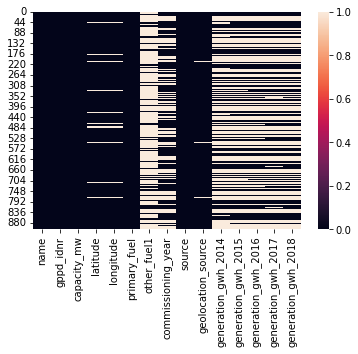

In [51]:
#Let us visualise the null values
sns.heatmap(df.isnull())

In [52]:
#Checking Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   gppd_idnr            907 non-null    object 
 2   capacity_mw          907 non-null    float64
 3   latitude             861 non-null    float64
 4   longitude            861 non-null    float64
 5   primary_fuel         907 non-null    object 
 6   other_fuel1          198 non-null    object 
 7   commissioning_year   527 non-null    float64
 8   source               907 non-null    object 
 9   geolocation_source   888 non-null    object 
 10  generation_gwh_2014  398 non-null    float64
 11  generation_gwh_2015  422 non-null    float64
 12  generation_gwh_2016  434 non-null    float64
 13  generation_gwh_2017  440 non-null    float64
 14  generation_gwh_2018  448 non-null    float64
dtypes: float64(9), object(6)
memory usage: 1

We can see that there are 7 object datatypes and 9 float datatypes

In [53]:
# Lets check the skewness 
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

- Most of the columns have missing values except the target variables and the column "source"

- The column "latitude" has numerical data and has no skewness and outliers so we can use mean method to fill the outliers

- For column "geolocation_source" and "other_fuel1" are object datatypes so we will use mode method to fill the data.

- For column "longitude" and "commissioning_year" the datatype if numerical so we can use median method to fill the data.

- Null values of other remaining columns can be removed using imputation techniques.

In [54]:
# Filling missing values in lattitude using mean

df["latitude"] = df["latitude"].fillna(df["latitude"].mean())

In [55]:
#let us replace the values in generation_gwh_2014 using knn imputers

knnimp=KNNImputer(n_neighbors=3)
knn_imp=pd.DataFrame(knnimp.fit_transform(df[["capacity_mw","generation_gwh_2014"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2014"]
knn_imp

df["generation_gwh_2014"]=knn_imp["generation_gwh_2014"]
df['generation_gwh_2014']

0        16.779017
1       324.532517
2        85.185267
3       617.789264
4      3035.550000
          ...     
902    3691.517167
903      16.779017
904      16.779017
905     213.394333
906      16.779017
Name: generation_gwh_2014, Length: 907, dtype: float64

In [56]:
# Similarly we will replace the values in generation_gwh_2015 using knn imputers

knn_imp=pd.DataFrame(knnimp.fit_transform(df[["capacity_mw","generation_gwh_2015"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2015"]
knn_imp

df["generation_gwh_2015"]=knn_imp["generation_gwh_2015"]
df['generation_gwh_2015']

0        13.293200
1       168.964267
2       112.481433
3       843.747000
4      5916.370000
          ...     
902       0.994875
903      13.293200
904      13.293200
905     187.315383
906      13.293200
Name: generation_gwh_2015, Length: 907, dtype: float64

In [57]:
# Similarly we will replace the values in generation_gwh_2016 using knn imputers

knn_imp=pd.DataFrame(knnimp.fit_transform(df[["capacity_mw","generation_gwh_2016"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2016"]
knn_imp

df["generation_gwh_2016"]=knn_imp["generation_gwh_2016"]
df['generation_gwh_2016']

0         8.974900
1       253.214233
2       114.819683
3       886.004428
4      6243.000000
          ...     
902     233.596650
903       8.974900
904       8.974900
905     216.123950
906       8.974900
Name: generation_gwh_2016, Length: 907, dtype: float64

In [58]:
# Similarly we will replace the values in generation_gwh_2017 using knn imputers

knn_imp=pd.DataFrame(knnimp.fit_transform(df[["capacity_mw","generation_gwh_2017"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2017"]
knn_imp

df["generation_gwh_2017"]=knn_imp["generation_gwh_2017"]
df['generation_gwh_2017']

0        22.244883
1       210.319783
2       185.902483
3       663.774500
4      5385.579736
          ...     
902     865.400000
903      22.244883
904      22.244883
905     243.171367
906      22.244883
Name: generation_gwh_2017, Length: 907, dtype: float64

In [59]:
# Similarly we will replace the values in generation_gwh_2018 using knn imputers

knn_imp=pd.DataFrame(knnimp.fit_transform(df[["capacity_mw","generation_gwh_2018"]]))
knn_imp.columns=["capacity_mw","generation_gwh_2018"]
knn_imp

df["generation_gwh_2018"]=knn_imp["generation_gwh_2018"]
df['generation_gwh_2018']

0        47.968950
1       299.083733
2       198.180783
3       626.239128
4      7279.000000
          ...     
902     686.500000
903      47.968950
904      47.968950
905     256.620450
906      47.968950
Name: generation_gwh_2018, Length: 907, dtype: float64

In [60]:
# Lets Replace the null values of column "other_fuel1" by its mode Oil

df["other_fuel1"] = df["other_fuel1"].fillna(df["other_fuel1"].mode()[0])

In [61]:
# Lets Replace the null values of column "geolocation_source" by its mode WRI

df["geolocation_source"] = df["geolocation_source"].fillna(df["geolocation_source"].mode()[0])

In [62]:
# Filling the null values using their median values

df["longitude"] = df["longitude"].fillna(df["longitude"].median())
df["commissioning_year"] = df["commissioning_year"].fillna(df["commissioning_year"].median())

- As per above steps, we have filled all the missing,null,NAN data using KNN imputers,mean and median.
- Now lets check if still there are any rows containing null values.

In [63]:
df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,2016.0,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,2001.0,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,2001.0,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,2001.0,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450


In [64]:
df.isnull().sum()

name                   0
gppd_idnr              0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

### We can see that now our dataset is not having any missing values.

<AxesSubplot:>

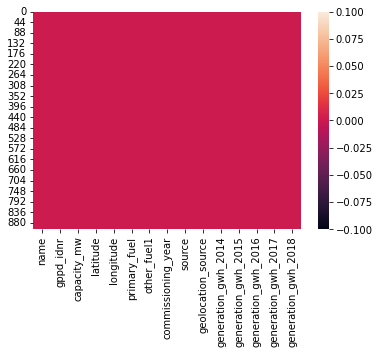

In [65]:
#Let us visualise the dataset after imputing and filling all the null values using heatmap.
sns.heatmap(df.isnull())

- Now as per heatmap we are able to visualize that there are no null values in our dataset.

### Now lets change the column "commisioning_year" to "age of power plant".

In [66]:
df['Powerplant_age']=2022-df['commissioning_year']
df.drop('commissioning_year',axis=1,inplace=True)
df.head()

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,11.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,21.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,21.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


- We have got our age of power plant.

# Statistical Description :

In [67]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1216.741950,1225.073916,1247.908108,1294.299953,1348.291762,23.271224
std,590.085456,6.079148,4.815073,2944.274717,3119.361453,3138.569942,3187.953881,3293.148855,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.725000,17.072000,74.388900,16.779017,13.293200,8.974900,22.244883,47.968950,19.000000
50%,59.200000,21.281800,76.719500,171.853083,139.546801,131.021600,128.822650,133.912800,21.000000
75%,385.250000,25.176450,79.206100,926.055500,735.113025,780.149650,817.977250,810.733240,24.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


### conclusion:
    
1.The counts of columns are same which means there are no missing values present in the dataset.

2.The mean is more than the median(50%) in all the columns except latitude which means they are skewed to right.

3.The median is little greater than the mean in the column latitude which means it is skewed to left.

4.From the difference between maximum and 75% percentile we can understand that there are huge outliers present in most of the columns, we will remove them using appropriate methods before building our model.

5.The minimum capacity of the power plant is zero and maximum in 4760 and there is huge difference in mean and standard deviation.

# Sepration of categorical and numerical columns.

In [68]:
# checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['name', 'gppd_idnr', 'primary_fuel', 'other_fuel1', 'source', 'geolocation_source']


In [69]:
# Now checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']


# VISUALIZATION OF DATA

### Univariate Analysis Plotting

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


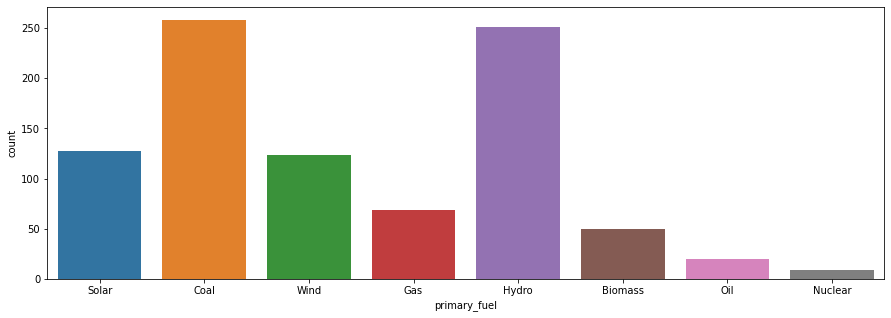

In [70]:
# Visualizing the types of fuel in primary_fuel
print(df["primary_fuel"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["primary_fuel"])
plt.show()

- As per above countplot we can say that coal & hydro are the highly used primary fuels, followed by solar & wind, followed by gas & biomass.

- Less used fuels are oil & nuclear.

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


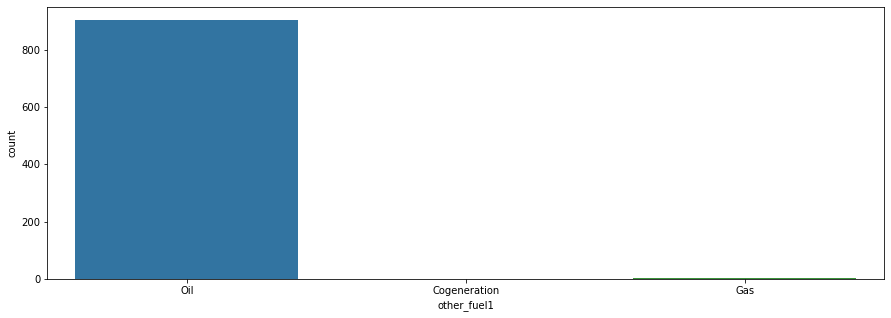

In [71]:
# Visualizing the types of fuel in other_fuel1
print(df["other_fuel1"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["other_fuel1"])
plt.show()

- As per above countplot we can see that oil is the fuel used at great number.

- Cogeneration and gas are not at all used in any cases.

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64


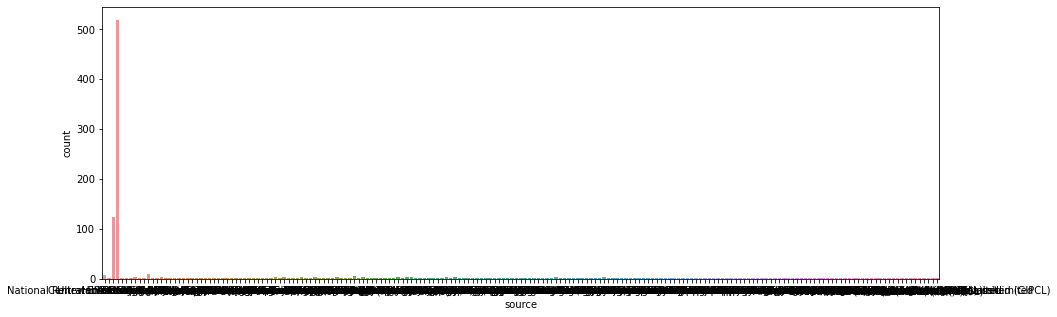

In [72]:
# Visualizing the source of fuel
print(df["source"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["source"])
plt.show()

- As per above plot we can see that source of fuel at "Central Electricity Authority " is high.

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


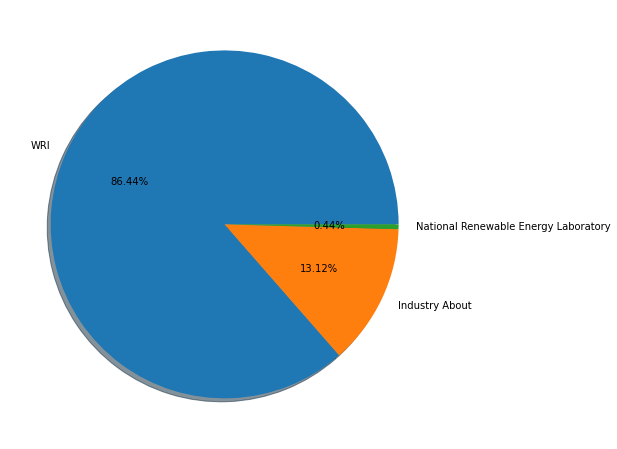

In [73]:
# Visualizing the counts of geolocation source

print(df["geolocation_source"].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

- As per above pie chart we can se that the count of WRI is high upto 86.44% in case of "geolocation_source"

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64


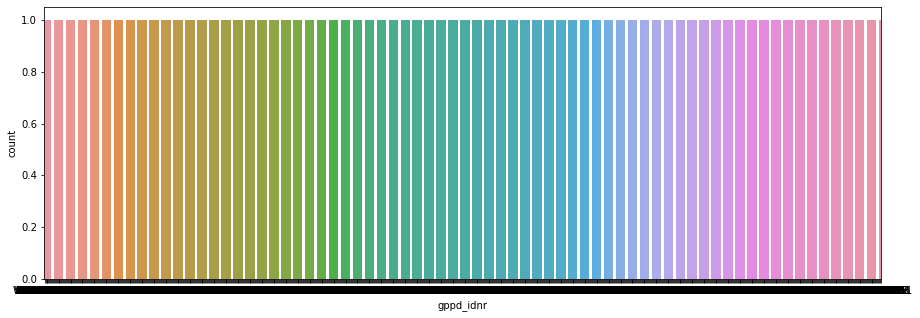

In [74]:
# Visualizing the count of gppd_idnr
print(df["gppd_idnr"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(df["gppd_idnr"])
plt.show()

### Bivarient plotting 

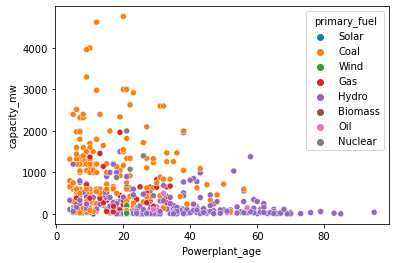

In [75]:
sns.scatterplot(x = "Powerplant_age", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- we can see that coal, hydor and gas fuels are used higher numbers.

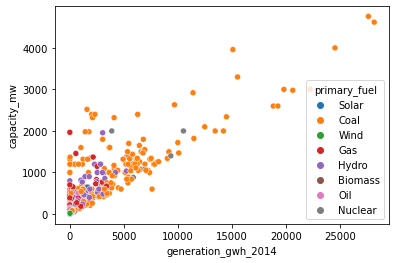

In [76]:
sns.scatterplot(x = "generation_gwh_2014", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- We can see the linear relationship between the feature and the label. Here the electricity generation reported for the year 2014 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

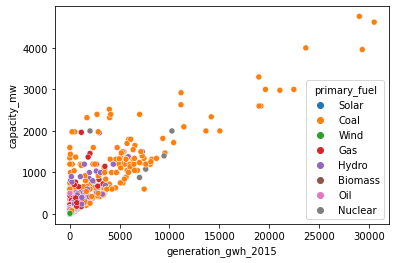

In [77]:
sns.scatterplot(x = "generation_gwh_2015", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- We can noticed the linear relationship between the feature and the label. Here the electricity generation reported for the year 2015 has capacity above 1000 mw also as the generation growth increases, the capacity of plant is also increasing moderately.

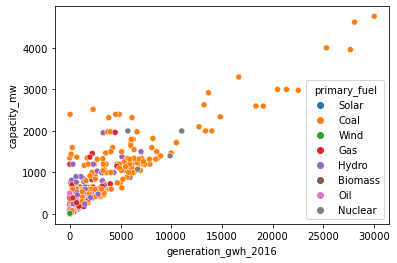

In [78]:
sns.scatterplot(x = "generation_gwh_2016", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- Same as in case of year 2014 & 2015, generation_gwh increases then capacity also increases.

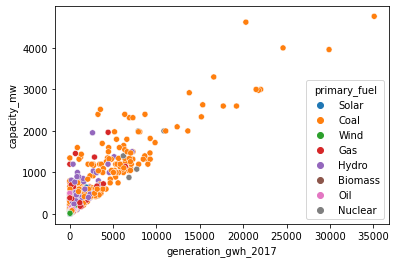

In [79]:
sns.scatterplot(x = "generation_gwh_2017", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- Capacity of the plant is increasing moderately with respect to the generation of year 2017

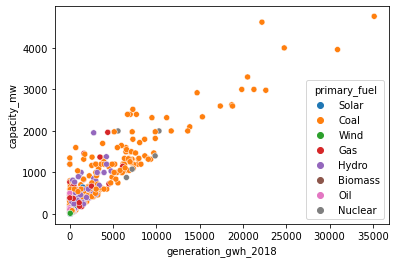

In [80]:
sns.scatterplot(x = "generation_gwh_2018", y = "capacity_mw",hue='primary_fuel', data = df)
plt.show()

- Capacity of the plant is increasing moderately with respect to the generation in year 2018

# Bar Plot

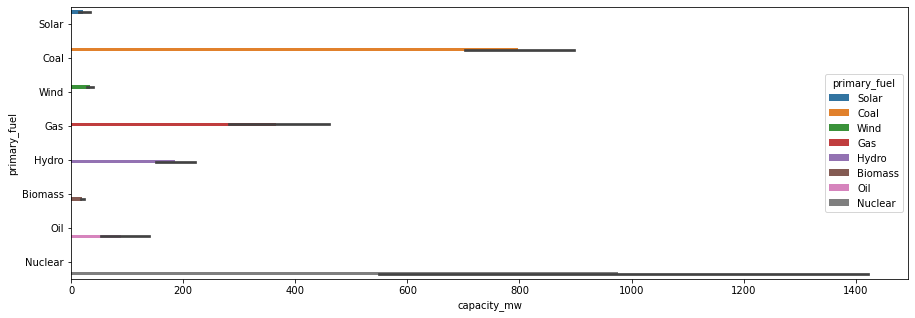

In [81]:
#Lets check the relation between primary_fuel and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "primary_fuel", data = df,hue='primary_fuel')
plt.show()

- As per above bar plot we can see that coal has high capacity, follower by gas and hydro.

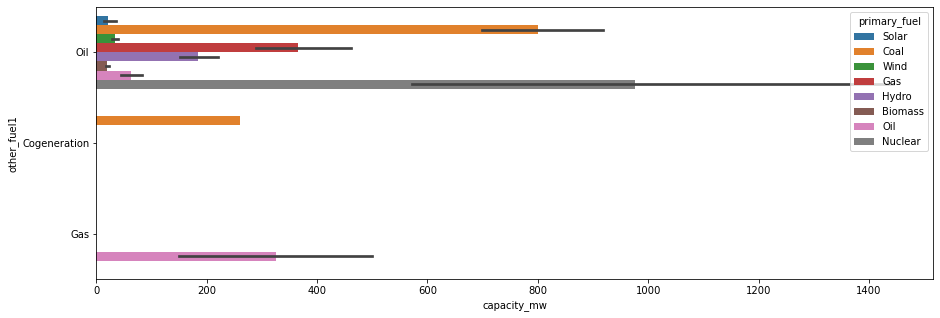

In [82]:
#Lets check the relation between other_fuel1 and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "other_fuel1", data = df,hue='primary_fuel')
plt.show()

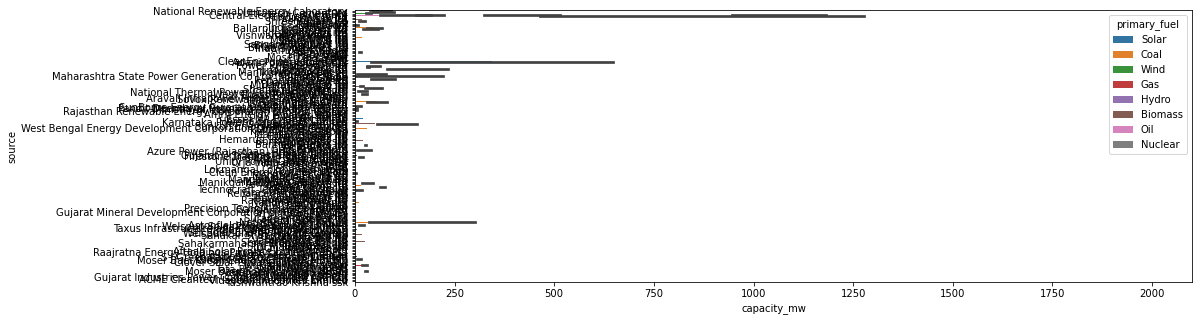

In [83]:
#Lets check the relation between source and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "capacity_mw", y = "source", data = df,hue='primary_fuel')
plt.show()

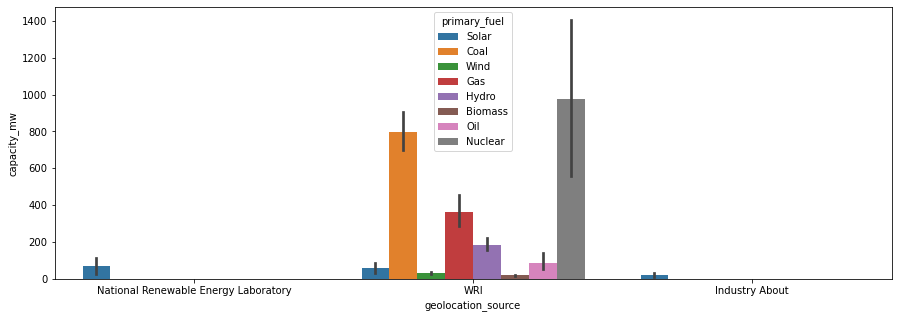

In [84]:
#Lets check the relation between geolocation_source and capacity_mw

plt.figure(figsize = (15,5))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df,hue='primary_fuel')
plt.show()

- The capacity of geolocation source "WRI" is maximum which has capacity more than 350 mega watts. The geolacation source "Industry About" has less capacity. In WRI all sources of power is used.

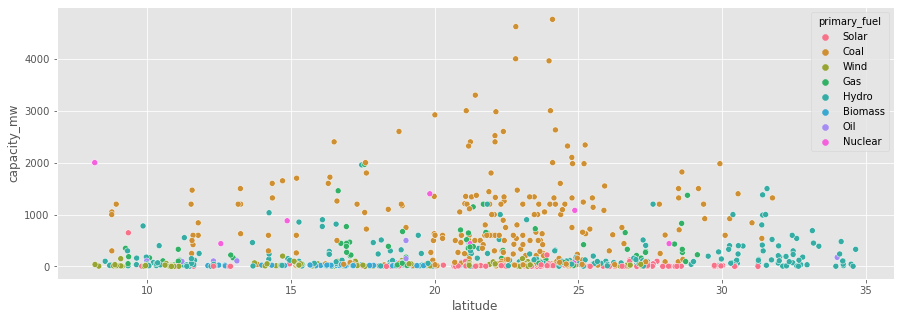

In [85]:
# Let's check how the capacity is reated to latitude of the power plant.

plt.figure(figsize=[15,5])
plt.style.use('ggplot')
sns.scatterplot(df['latitude'],df["capacity_mw"],hue=df['primary_fuel']);

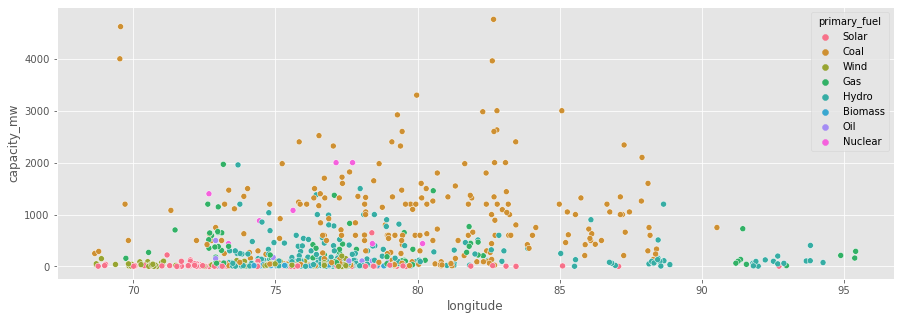

In [86]:
# Let's check how the capacity is reated to longitude of the power plant.

plt.figure(figsize=[15,5])
plt.style.use('ggplot')
sns.scatterplot(df['longitude'],df["capacity_mw"],hue=df['primary_fuel']);

# Line Plot

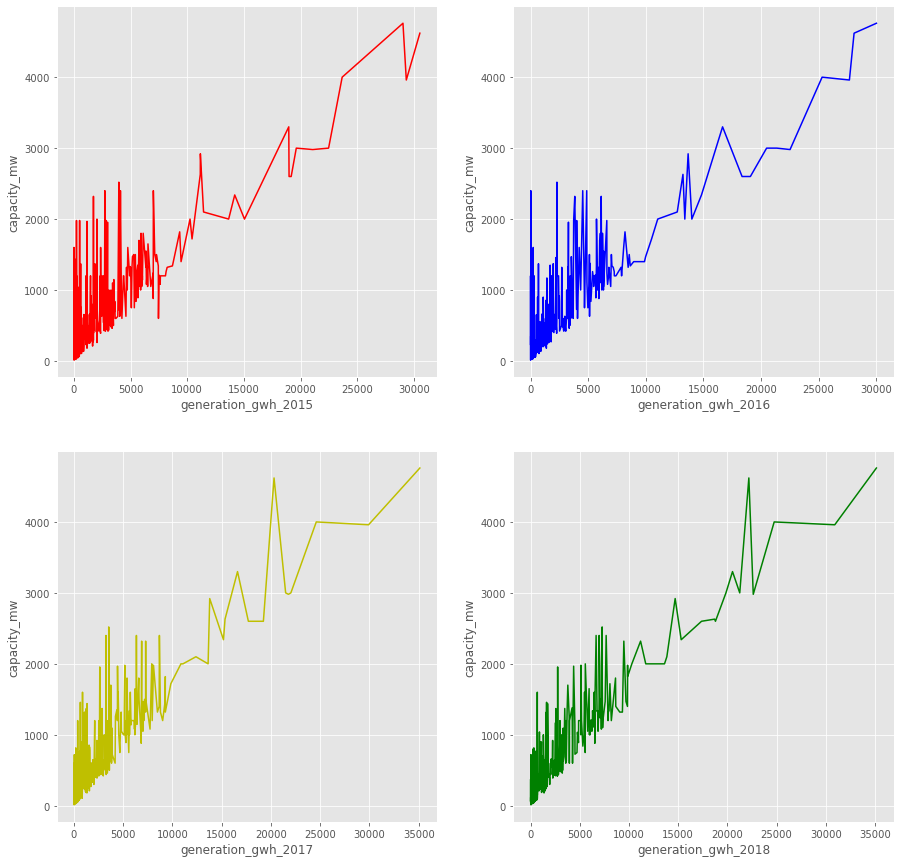

In [87]:
fig,axes=plt.subplots(2,2,figsize=(15,15))

# Checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,0],data=df,color="r")

# Checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[0,1],data=df,color="b")

# Checking attrition level in Monthlyrate
sns.lineplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,0],data=df,color="y")

# Checking attrition level in Monthlyincome
sns.lineplot(x='generation_gwh_2018',y='capacity_mw',ax=axes[1,1],data=df,color="g")
plt.show()

- As per above line plots we can see that when generation is increasing capacity of the plant is also increasing in the year 2015,2016,2017,2018.

- There is a positive linear relationship between the capacity and the electricity generation.

# Distribution plot

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

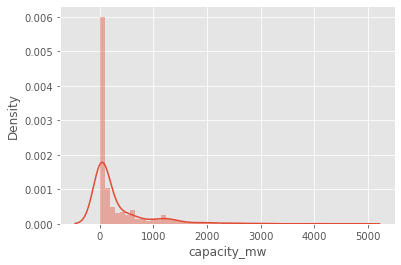

In [88]:
sns.distplot(df['capacity_mw'])

<AxesSubplot:xlabel='latitude', ylabel='Density'>

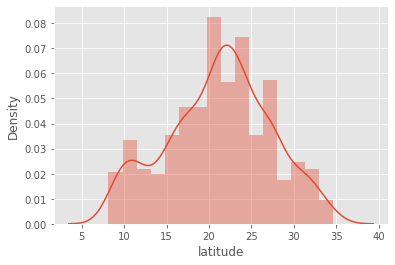

In [89]:
sns.distplot(df['latitude'])

<AxesSubplot:xlabel='longitude', ylabel='Density'>

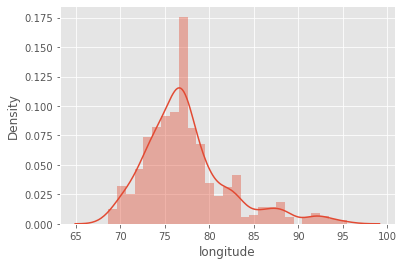

In [90]:
sns.distplot(df['longitude'])

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

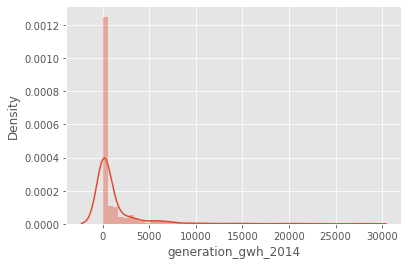

In [91]:
sns.distplot(df['generation_gwh_2014'])

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

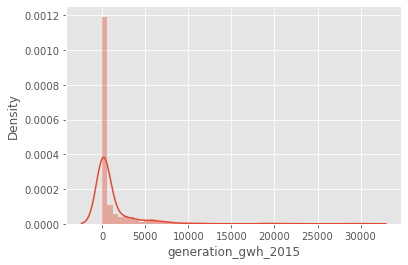

In [92]:
sns.distplot(df['generation_gwh_2015'])

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

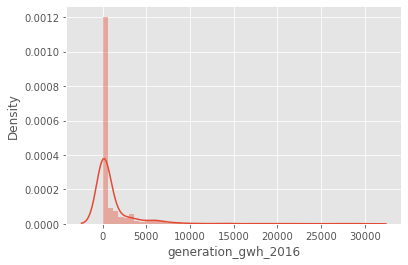

In [93]:
sns.distplot(df['generation_gwh_2016'])

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

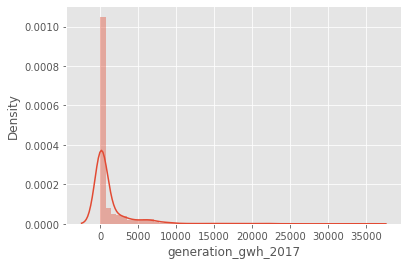

In [94]:
sns.distplot(df['generation_gwh_2017'])

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

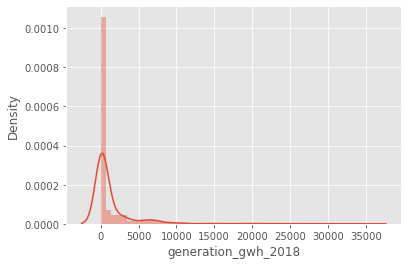

In [95]:
sns.distplot(df['generation_gwh_2018'])

<AxesSubplot:xlabel='Powerplant_age', ylabel='Density'>

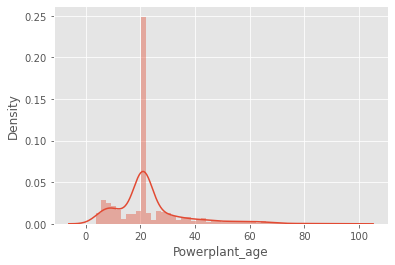

In [96]:
sns.distplot(df['Powerplant_age'])

- Above distribution plots show bell shaped curves.

# Pairplot

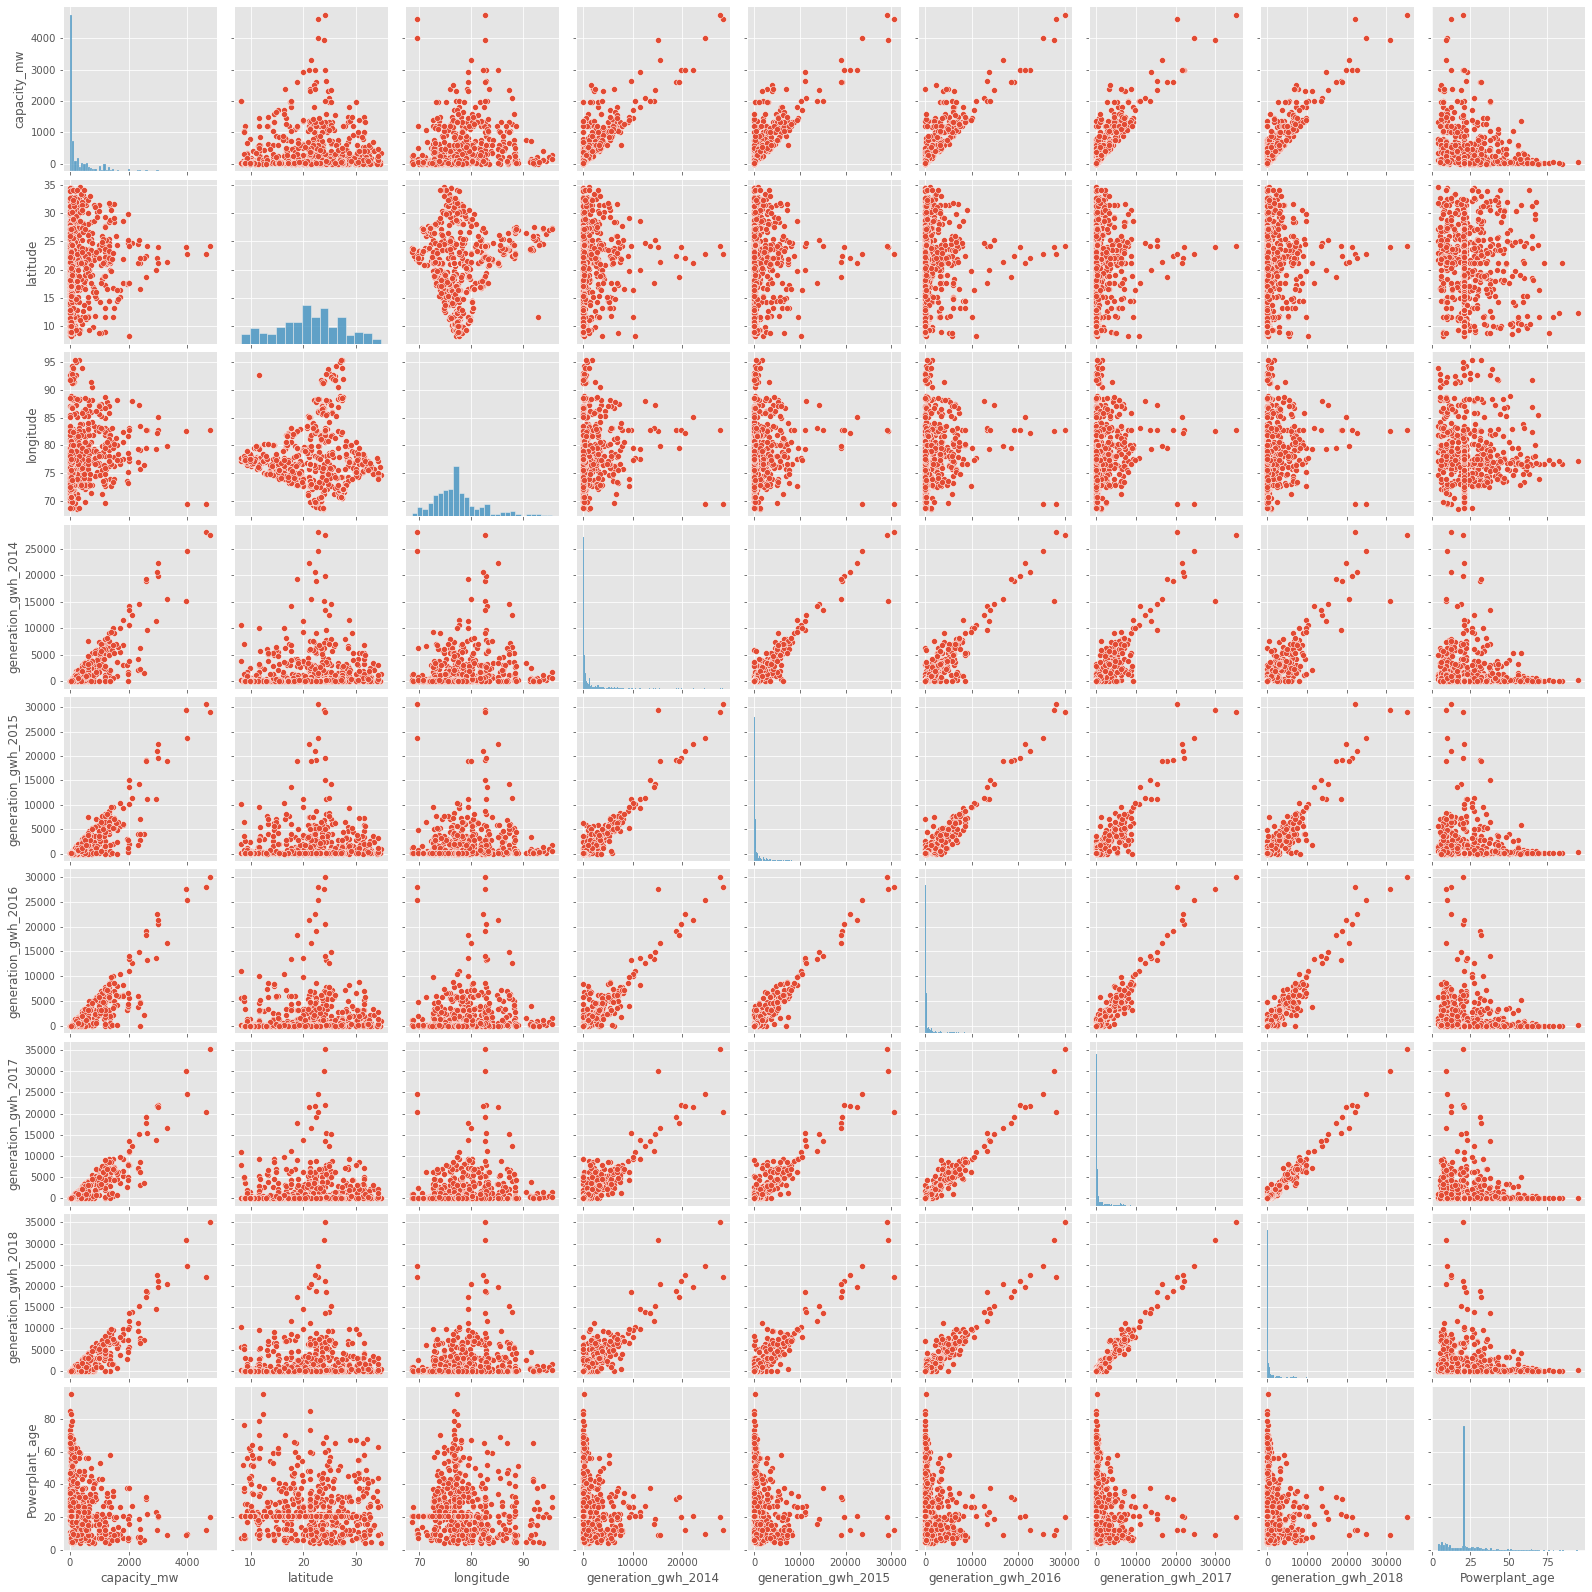

In [97]:
# Checking the pairwise relation between the features.
sns.pairplot(df)

- From the above pairplot , we conclude that there are linear relationship between few variable, let us check multicollinearity to avoid later problem.

# Checking for outliers:

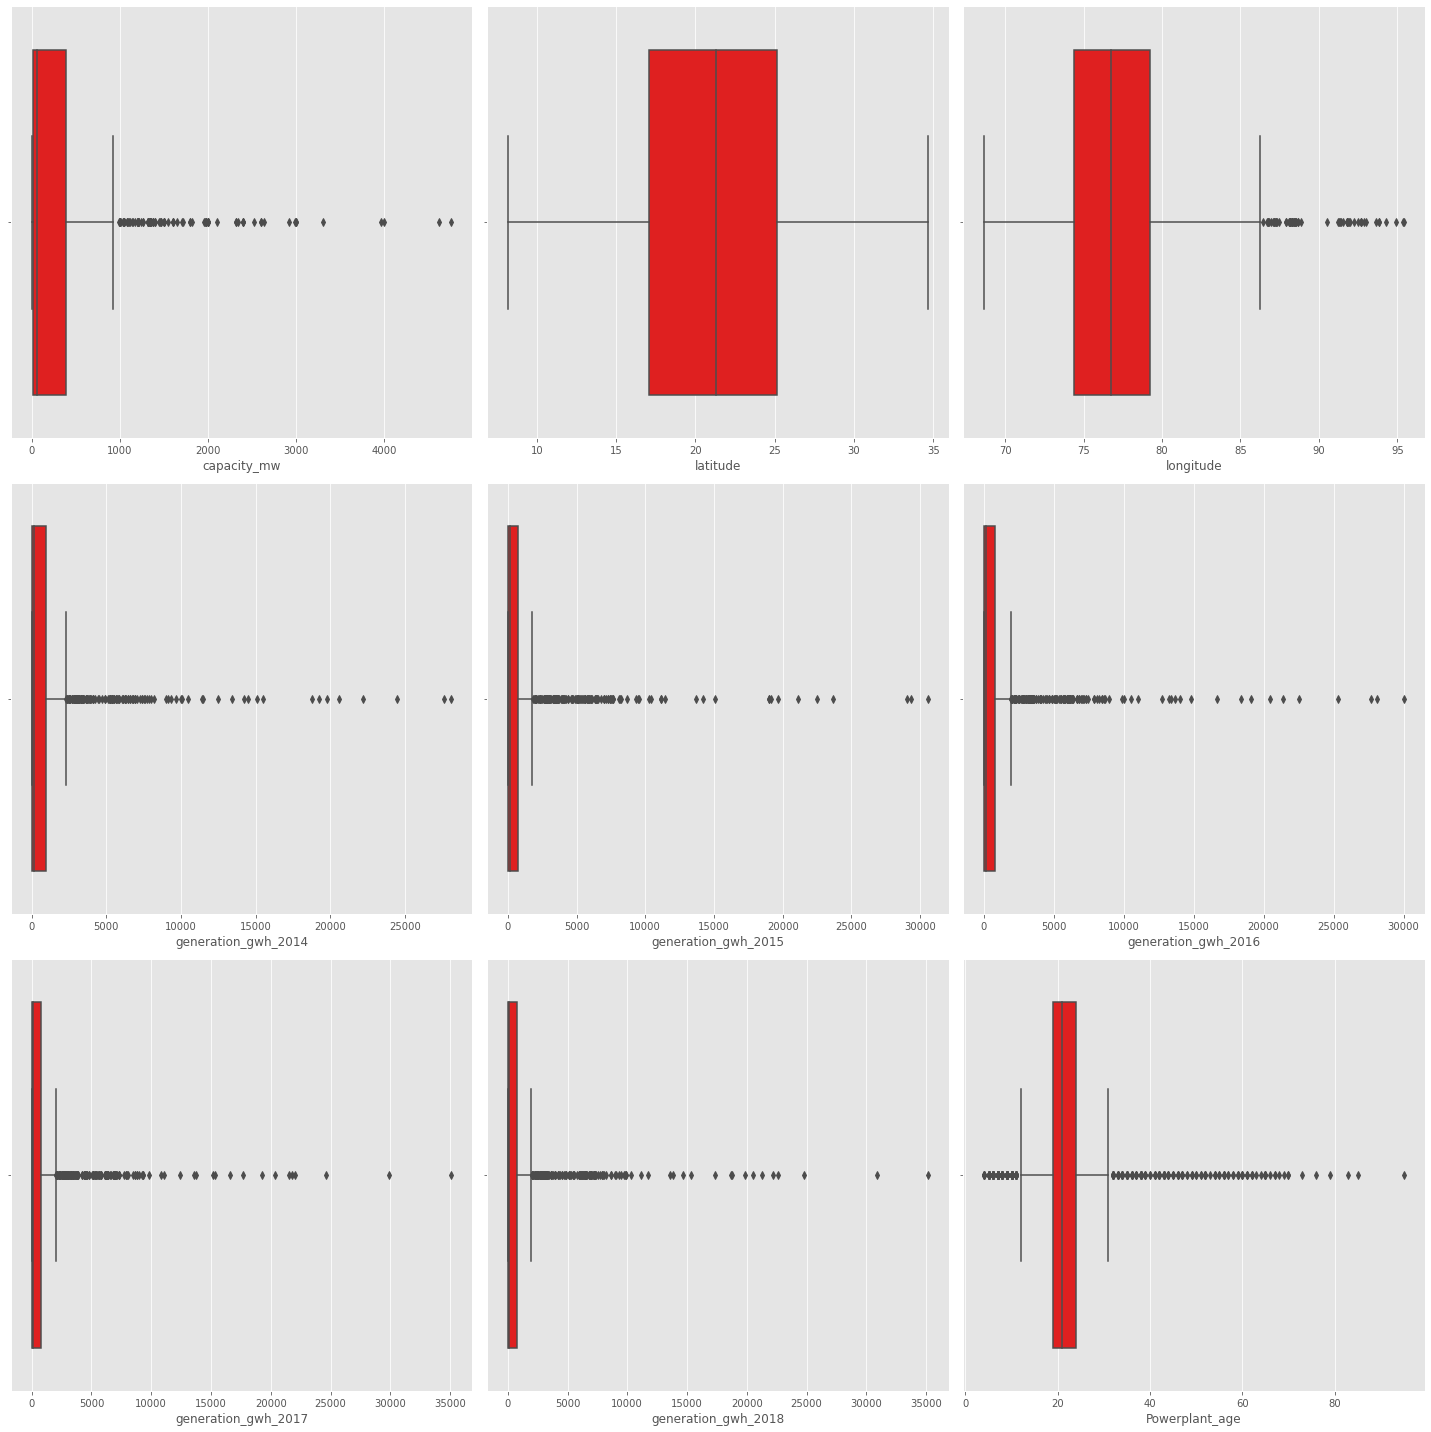

In [98]:
# Identifying the outliers
# Identifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="red")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

all features contained outliers except latitude column.

# Removing outliers using Zscore method

In [99]:
# Features containing outliers
features = df[['longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Powerplant_age']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,0.869917,0.407783,0.388685,0.394962,0.399239,0.395075,0.933076
1,0.585590,0.303199,0.338753,0.317101,0.340211,0.318779,0.172699
2,1.673567,0.384536,0.356870,0.361220,0.347875,0.349436,0.172699
3,2.895239,0.203542,0.122313,0.115372,0.197893,0.219380,0.400812
4,1.035238,0.618085,1.504758,1.592397,1.284064,1.801917,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.841002,0.392630,0.323355,0.134612,0.201071,1.313265
903,0.153415,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
904,0.383592,0.407783,0.388685,0.394962,0.399239,0.395075,0.172699
905,0.764564,0.340967,0.332867,0.328925,0.329901,0.331681,0.172699


In [100]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,16.779017,13.293200,8.974900,22.244883,47.968950,11.0
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,21.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,21.0
3,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,3691.517167,0.994875,233.596650,865.400000,686.500000,6.0
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,21.0
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,21.0
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,21.0


In [101]:
#checking % of data loss
new_df.shape

(852, 15)

In [102]:
(907-852)/907*100

6.063947078280044

##### After using Z-Score method for removing outliers, we are losing 6% of data from our dataset.

# Removing the outlier using IQR Method

In [103]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

new_df1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
new_df1

,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
1,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,WRI,324.532517,168.964267,253.214233,210.319783,299.083733,21.0
2,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,Oil,CDM,WRI,85.185267,112.481433,114.819683,185.902483,198.180783,21.0
5,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,Central Electricity Authority,WRI,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,17.0
7,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,Oil,Central Electricity Authority,WRI,674.391100,721.335200,675.724400,679.594950,579.318850,12.0
8,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,Oil,Central Electricity Authority,WRI,480.594950,144.434200,402.029750,439.372100,406.377900,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901,YELHANKA (DG),IND0000512,106.6,13.1156,77.5838,Oil,Oil,Central Electricity Authority,WRI,0.000000,0.000000,0.000000,356.782283,0.000000,29.0
903,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,Industry About,16.779017,13.293200,8.974900,22.244883,47.968950,21.0
904,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,Oil,CDM,WRI,16.779017,13.293200,8.974900,22.244883,47.968950,21.0
905,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,WRI,213.394333,187.315383,216.123950,243.171367,256.620450,21.0


In [104]:
#checking the %loss of data
(907-508)/907*100

43.991179713340685

##### 43% of data loss is not acceptaple as we are losing our half data we cannot afford using IQR method, So we will use zscore method and proceed with new_df

# Encoding the categorical columns using Label Encoding.

In [105]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,108,1
1,1,2,173,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,76,0
904,7,2,21,2
905,1,2,59,2


In [106]:
# Lets check the skewness of our new dataset
new_df.skew()

capacity_mw             2.178028
latitude               -0.114376
longitude               0.944500
primary_fuel            0.418465
other_fuel1           -19.820871
source                  1.744999
geolocation_source     -2.068499
generation_gwh_2014     2.562088
generation_gwh_2015     2.519395
generation_gwh_2016     2.504234
generation_gwh_2017     2.430029
generation_gwh_2018     2.502936
Powerplant_age          1.278164
dtype: float64

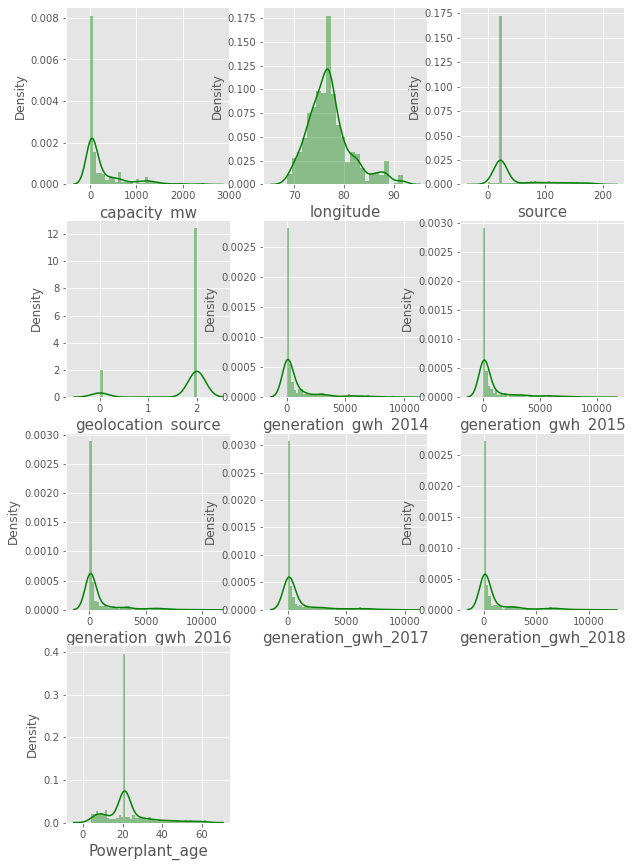

In [107]:
#lets plot skewness of new dataset using distribution plot

feature=new_df[["capacity_mw",'longitude','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']]

#Visualizing

plt.figure(figsize = (10,15))
plotnumber = 1

for column in feature:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(feature[column], color = 'g')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

### We can see high skewness is present in all the columns.

# Lets reduce the skewness by using powertransformer method

In [108]:
skew_features=["capacity_mw",'longitude','other_fuel1','source','geolocation_source','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Powerplant_age']

from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method='yeo-johnson')
new_df[skew_features] = scaler.fit_transform(new_df[skew_features].values)
new_df[skew_features].head()

,capacity_mw,longitude,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,0.059444,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,0.217991,-0.500876,0.059444,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-0.276045,-2.378126,0.059444,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,0.389150,2.432203,0.059444,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.727387,1.261806,0.059444,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097


- Skewness is reduced little bit.

- Now lets plot the same.

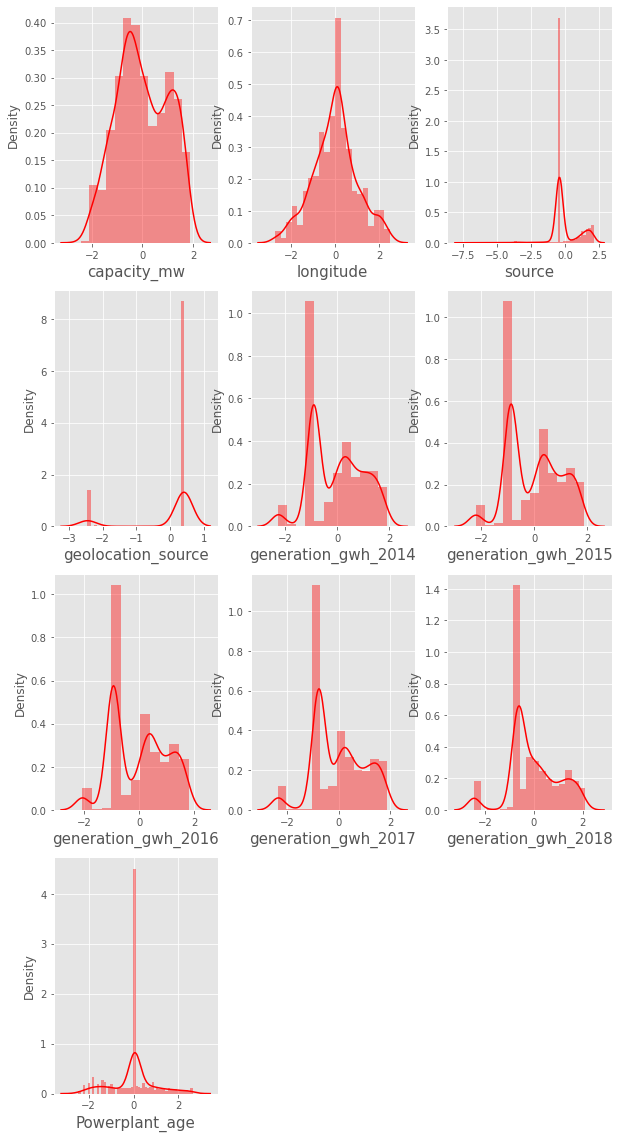

In [109]:
plt.figure(figsize = (10,20))
plotnumber = 1

for column in feature:
    if plotnumber <= 10:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column], color = 'r')
        plt.xlabel(column,fontsize=15)
        
    plotnumber += 1
plt.show()

- The above distribution plots are reflecting the plots after the skewness is reduced.

# Correlation using Heatmap

In [110]:
df.corr()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.050984,0.199299,0.856402,0.865546,0.887566,0.900910,0.912287,-0.211042
latitude,0.050984,1.000000,0.036341,0.056823,0.053340,0.049539,0.057951,0.054626,-0.087937
longitude,0.199299,0.036341,1.000000,0.161994,0.163463,0.183282,0.195420,0.192411,-0.029583
generation_gwh_2014,0.856402,0.056823,0.161994,1.000000,0.959103,0.937960,0.916587,0.909878,-0.095893
generation_gwh_2015,0.865546,0.053340,0.163463,0.959103,1.000000,0.974132,0.946379,0.942575,-0.114861
generation_gwh_2016,0.887566,0.049539,0.183282,0.937960,0.974132,1.000000,0.974370,0.966330,-0.137631
generation_gwh_2017,0.900910,0.057951,0.195420,0.916587,0.946379,0.974370,1.000000,0.987739,-0.146887
generation_gwh_2018,0.912287,0.054626,0.192411,0.909878,0.942575,0.966330,0.987739,1.000000,-0.150541
Powerplant_age,-0.211042,-0.087937,-0.029583,-0.095893,-0.114861,-0.137631,-0.146887,-0.150541,1.000000


- Above observation shows Correlation of target variable with other feature variables before removing outliers.

In [111]:
new_df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.057972,0.342446,-0.529581,-0.044733,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.254055
latitude,0.057972,1.000000,-0.069975,-0.000886,0.033249,0.060840,-0.207337,0.127853,0.121847,0.152363,0.140021,0.151176,-0.107911
longitude,0.342446,-0.069975,1.000000,-0.413280,0.039861,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.142751
primary_fuel,-0.529581,-0.000886,-0.413280,1.000000,-0.010352,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.149530
other_fuel1,-0.044733,0.033249,0.039861,-0.010352,1.000000,0.024926,-0.024299,0.004380,0.035902,0.058949,0.022587,0.077934,-0.071269
source,-0.334412,0.060840,-0.198453,0.006314,0.024926,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.006093
geolocation_source,0.474987,-0.207337,0.303271,-0.481369,-0.024299,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.003668
generation_gwh_2014,0.757459,0.127853,0.267497,-0.376449,0.004380,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.104245
generation_gwh_2015,0.760339,0.121847,0.247803,-0.371171,0.035902,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.127754
generation_gwh_2016,0.792913,0.152363,0.297372,-0.398699,0.058949,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.184095


- new_df.corr() shows correlation of target variable & other feature variables after outlier removal.

### We can visualize this correlation by plotting heat map.

<AxesSubplot:>

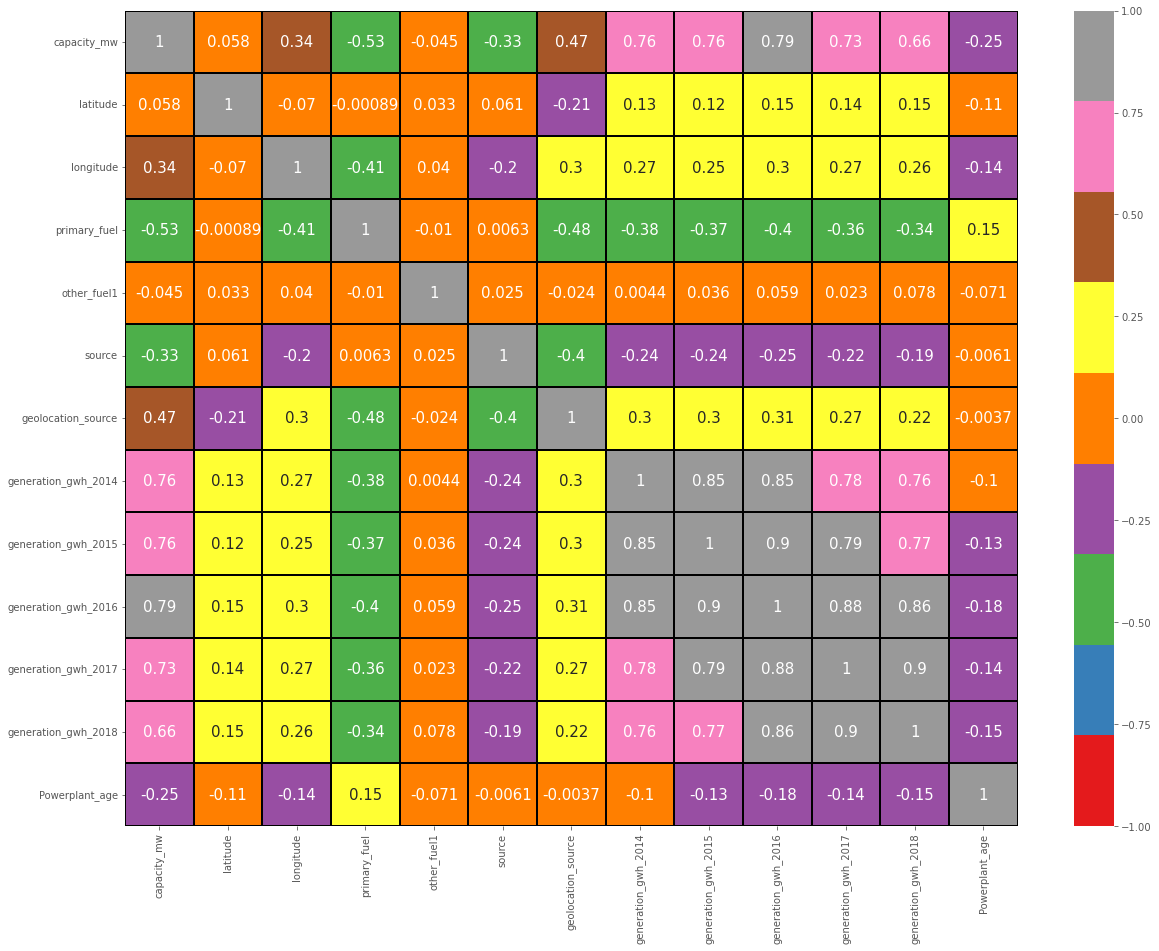

In [112]:
plt.figure(figsize=(20,15))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="Set1")

1. The target variable "capacity_mw" is highly & positively correlated with the features columns "generation_gwh_2017, generation_gwh_2016,generation_gwh_2015, generation_gwh_2014, generation_gwh_2018".

2. The target variable is negatively correlated with the features columns "primary_fuel, source and Power_plant_age".

3. The feature columns "other_fuel1" and "latitude" have no relation with the target variable, so we can drop them.

In [113]:
new_df.drop('other_fuel1',axis=1,inplace=True)
new_df.drop('latitude',axis=1,inplace=True)

In [114]:
new_df

,name,gppd_idnr,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,ACME Solar Tower,WRI1020239,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,ADITYA CEMENT WORKS,WRI1019881,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,AES Saurashtra Windfarms,WRI1026669,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,AGARTALA GT,IND0000001,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,AKALTARA TPP,IND0000002,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,IND0000513,1.668461,0.231036,1,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.978959
903,Yelesandra Solar Power Plant,WRI1026222,-1.598358,0.420781,6,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
904,Yelisirur wind power project,WRI1026776,-0.508660,-0.225422,7,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
905,ZAWAR MINES,WRI1019901,0.109050,-0.761662,1,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.052726


# There is no relation of column "gppd_idnr" with target variable as it just a id given to the power plant , so lets drop it too.

In [115]:
new_df.drop('gppd_idnr',axis=1,inplace=True)

# Also lets drop the fetaure column "name" as it do not contribute much to our dataset.

In [116]:
new_df.drop('name',axis=1,inplace=True)

# Visualizing the correlation between capacity_mw and features using bar plot

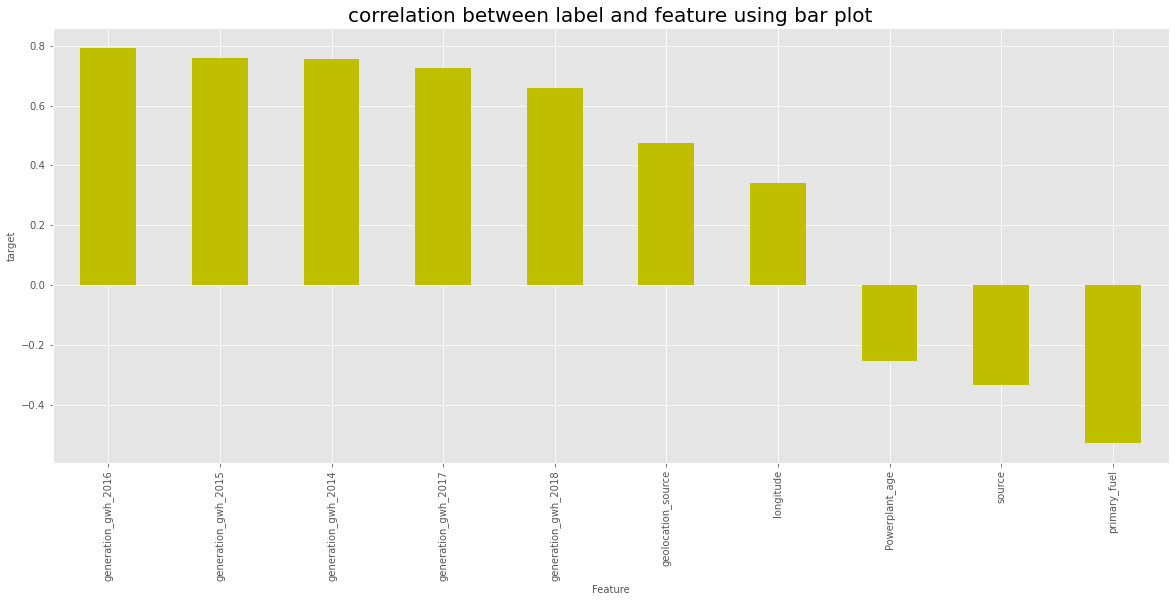

In [117]:
plt.figure(figsize=(20,8))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

In [118]:
#Let us save one Data Frame for classification problem
Classification_df=new_df

# Seperating Label "x" and Features "y":

In [119]:
x=new_df.drop('capacity_mw',axis=1)
y=new_df['capacity_mw']
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097


In [120]:
x.shape

(852, 10)

In [121]:
y.shape

(852,)

In [122]:
y.head()

0   -1.677481
1    0.217991
2   -0.276045
3    0.389150
4    1.727387
Name: capacity_mw, dtype: float64

# Standard Scalarization for Feature Scaling:

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-0.923030,1.177615,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,-0.500876,-0.972680,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-2.378126,1.607673,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,2.432203,-0.542621,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.261806,-0.972680,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097
...,...,...,...,...,...,...,...,...,...,...
847,0.231036,-0.972680,-0.419323,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.978959
848,0.420781,1.177615,1.153075,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
849,-0.225422,1.607673,-0.486073,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
850,-0.761662,-0.972680,0.863803,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.052726


# Checking VIF(Variance Inflation Factor) values:

let's check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

In [124]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1.297249,longitude
1,1.739615,primary_fuel
2,1.361678,source
3,1.662859,geolocation_source
4,4.225291,generation_gwh_2014
5,6.426407,generation_gwh_2015
6,10.784706,generation_gwh_2016
7,7.292499,generation_gwh_2017
8,6.220002,generation_gwh_2018
9,1.079445,Powerplant_age


- We can observe that all the columns have VIF less than 10 except column "generation_gwh_2016" is slightly above that, which we can ignore. 

- Let's proceed to buliding machine learning models.

# MODEL BUILDING:

In [125]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9333475612446297  on Random_state  129


- We have got our maximum R2 score as 0.93 and random state as 129.

# Building Machine Learning Model for Regression and Evaluation Metrics

In [126]:
# creating new test-train split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [127]:
# Regression Model Function

def reg(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=121)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting x_test
    pred = model.predict(x_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

- I have built a function that splits the training and testing 'y' features and 'x' labels.

- Then it trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [128]:
# Linear Regression Model

model=LinearRegression()
reg(model, x, y)

RMSE Score is: 0.5346148346618403
R2 Score is: 72.61414678806433
Cross Validation Score: 74.42692470375401
R2 Score - Cross Validation Score is -1.8127779156896793


- Created the Linear Regression model and checked it's evaluation metrics

In [129]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, x, y)

RMSE Score is: 0.48086979618719977
R2 Score is: 77.84359658271104
Cross Validation Score: 76.46800760965503
R2 Score - Cross Validation Score is 1.3755889730560114


- Created the Support Vector Regression model and checked it's evaluation metrics.

In [130]:
# Decision Tree Regressor

model=DecisionTreeRegressor(random_state=129)
reg(model, x, y)

RMSE Score is: 0.39777134669819814
R2 Score is: 84.8395791871328
Cross Validation Score: 80.33769319498361
R2 Score - Cross Validation Score is 4.501885992149184


- Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [131]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, x, y)

RMSE Score is: 0.4754983547081341
R2 Score is: 78.33581767319238
Cross Validation Score: 80.97778745130014
R2 Score - Cross Validation Score is -2.6419697781077645


- Created the Random Forest Regressor model and checked it's evaluation metrics.

In [132]:
# K Neighbors Regressor

model1=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, x, y)

RMSE Score is: 0.46980795855690244
R2 Score is: 78.85123536921232
Cross Validation Score: 81.1893693702754
R2 Score - Cross Validation Score is -2.3381340010630822


- Created the K Neighbors Regressor model and checked it's evaluation metri

In [133]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, x, y)

RMSE Score is: 0.5301089033830124
R2 Score is: 73.07383753887308
Cross Validation Score: 76.3661811585749
R2 Score - Cross Validation Score is -3.2923436197018248


- Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [134]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, x, y)

RMSE Score is: 0.37390649296011985
R2 Score is: 86.60414991586201
Cross Validation Score: 88.09454530471123
R2 Score - Cross Validation Score is -1.4903953888492225


- Created the Ada Boost Regressor model and checked it's evaluation metrics

In [135]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, x, y)

RMSE Score is: 0.315057032792731
R2 Score is: 90.4890779569891
Cross Validation Score: 88.65641556122978
R2 Score - Cross Validation Score is 1.8326623957593284


- Created the Extra Trees Regressor model and checked it's evaluation metrics.

# By comparing all the regression models, I am selecting "K Neighbors Regressor" as my best model.

# Hyperparameter tuning

In [137]:
# Choosing K Neighbors regressor

param = [{'n_neighbors': [1,2,3,4,5], 'weights': ['uniform','distance']}]

In [138]:
# Search for best hyperparameters

grid = GridSearchCV(estimator=model1, param_grid=param, scoring='r2')
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsRegressor(algorithm='kd_tree', n_neighbors=2),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

- I am using the Grid Search CV method for hyper parameter tuning my best model.

In [139]:
# Now lets get the results

print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

0.865036802650167
KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4)
{'n_neighbors': 4, 'weights': 'uniform'}


- Here the Grid Search CV has provided me with the best parameters,best estimator & best score list out of all the combinations it used to train the model

In [140]:
Final_Model = KNeighborsRegressor(algorithm='kd_tree', n_neighbors=4)
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_r2 = r2_score(y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 89.65209732749635


- Our machine learning model has achieved 89.65% accuracy.

# Lets Save this Model

In [141]:
# Saving the model using .pkl
filename = "Global Power Plant Database.pkl"
joblib.dump(Final_Model, filename)

['Global Power Plant Database.pkl']

- Finally, I have saved my best regression model using the joblib library.

# Loading the model

In [142]:
# Loading the saved model

model=joblib.load("Global Power Plant Database.pkl")

#Prediction

prediction = model.predict(x_test)
new = np.array(y_test)
df_final = pd.DataFrame({"Original":new,"Predicted":prediction},index=range(len(new)))
df_final

,Original,Predicted
0,-0.396120,-0.117947
1,-0.458110,-0.159056
2,-0.948842,-0.976363
3,0.165116,-0.078476
4,1.523747,1.439858
...,...,...
251,0.860692,0.847786
252,1.698815,1.475538
253,1.377918,0.928084
254,1.593827,1.383005


# Now Lets plot the prediction

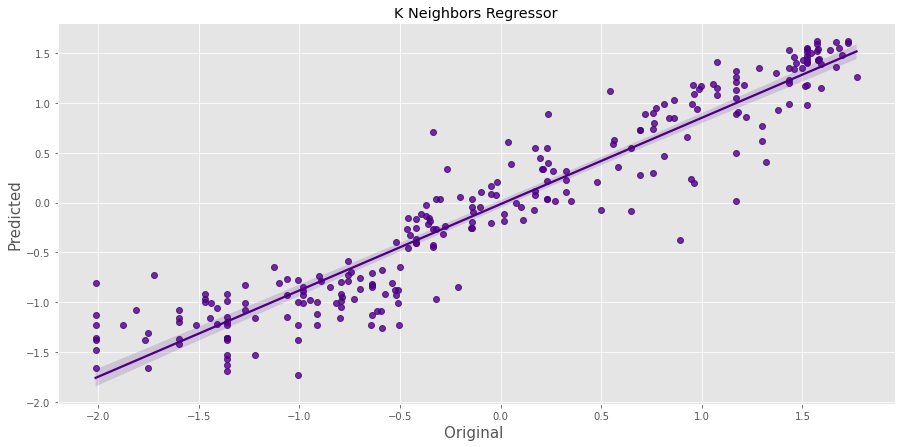

In [143]:
plt.figure(figsize=(15,7))
sns.regplot(y_test,prediction,color='indigo')
plt.xlabel('Original ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("K Neighbors Regressor")
plt.show()

### We have completed our Model1 which is regression model.

# MODEL 2 : 
    
### So lets us do the classification.

- We have already saved our dataset in "Classification_df=new_df" after removing skewness.

In [144]:
Classification_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-0.923030,6,1.528956,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,0.217991,-0.500876,1,1.988904,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-0.276045,-2.378126,7,-0.486073,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,0.389150,2.432203,2,-0.419323,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.727387,1.261806,1,-0.419323,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097


# Checking Correlation using Heatmap:

In [145]:
Classification_df.corr()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
capacity_mw,1.000000,0.342446,-0.529581,-0.334412,0.474987,0.757459,0.760339,0.792913,0.725192,0.658112,-0.254055
longitude,0.342446,1.000000,-0.413280,-0.198453,0.303271,0.267497,0.247803,0.297372,0.273371,0.260847,-0.142751
primary_fuel,-0.529581,-0.413280,1.000000,0.006314,-0.481369,-0.376449,-0.371171,-0.398699,-0.356194,-0.336625,0.149530
source,-0.334412,-0.198453,0.006314,1.000000,-0.396947,-0.244797,-0.244136,-0.252735,-0.224322,-0.190145,-0.006093
geolocation_source,0.474987,0.303271,-0.481369,-0.396947,1.000000,0.301693,0.300898,0.313515,0.266767,0.223006,-0.003668
generation_gwh_2014,0.757459,0.267497,-0.376449,-0.244797,0.301693,1.000000,0.848410,0.848035,0.776621,0.755111,-0.104245
generation_gwh_2015,0.760339,0.247803,-0.371171,-0.244136,0.300898,0.848410,1.000000,0.904655,0.793076,0.774797,-0.127754
generation_gwh_2016,0.792913,0.297372,-0.398699,-0.252735,0.313515,0.848035,0.904655,1.000000,0.884353,0.862621,-0.184095
generation_gwh_2017,0.725192,0.273371,-0.356194,-0.224322,0.266767,0.776621,0.793076,0.884353,1.000000,0.904954,-0.135213
generation_gwh_2018,0.658112,0.260847,-0.336625,-0.190145,0.223006,0.755111,0.774797,0.862621,0.904954,1.000000,-0.150454


<AxesSubplot:>

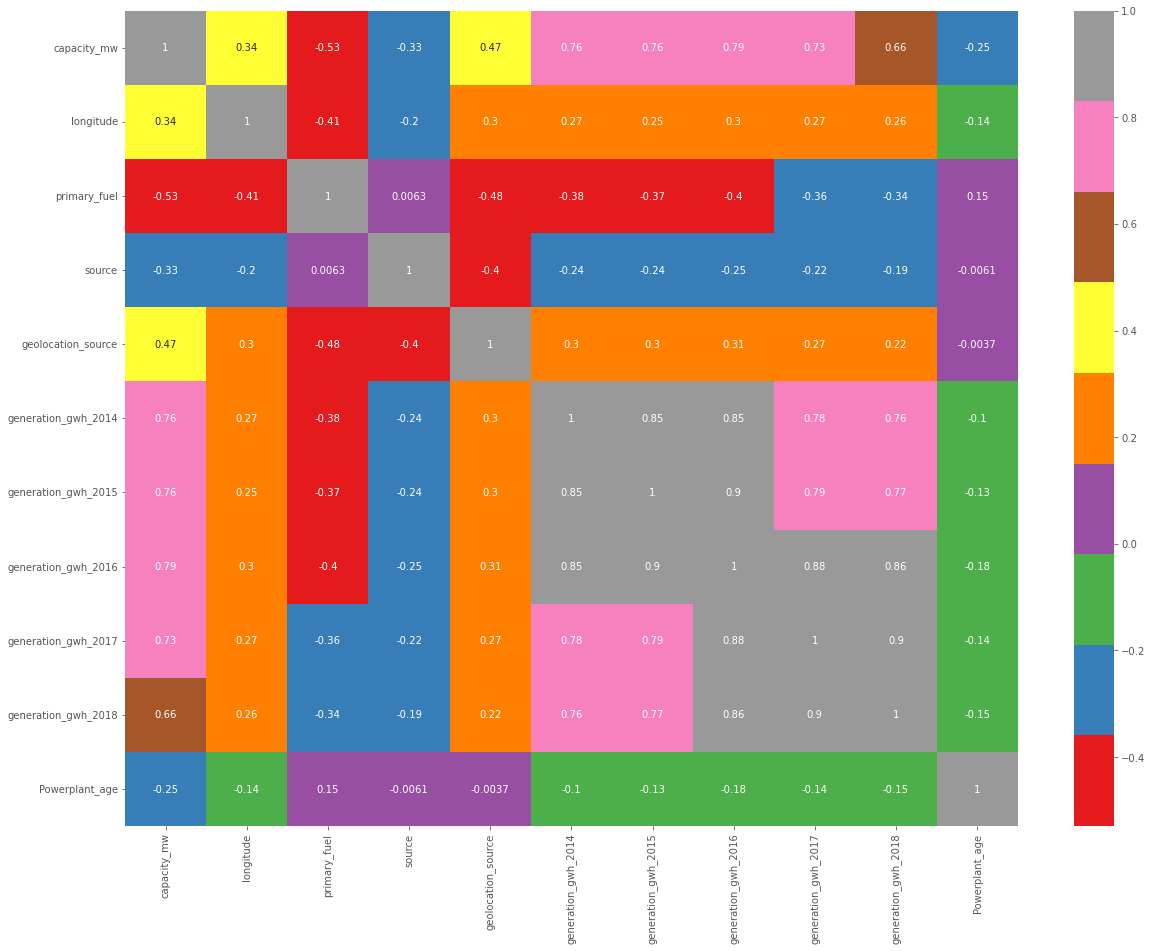

In [146]:
plt.figure(figsize=(20,15))
sns.heatmap(Classification_df.corr(), annot = True, linecolor="black",cmap="Set1")

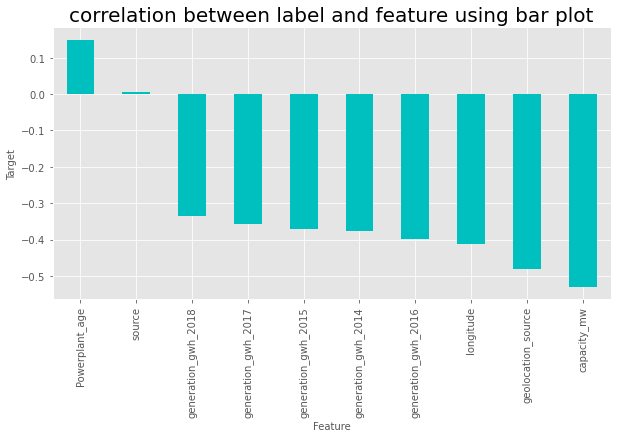

In [147]:
plt.figure(figsize=(10,5))
Classification_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('Target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

- We will have to drop the columns "source" and "longitude" as this columns do not contribute much in building our model.

In [148]:
Classification_df.drop(columns=['source','longitude'],axis=1,inplace=True)

In [149]:
Classification_df.head()

,capacity_mw,primary_fuel,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,6,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,0.217991,1,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-0.276045,7,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,0.389150,2,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.727387,1,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097


# Seperating Label "x" and Features "y"

In [150]:
c_x=Classification_df.drop("primary_fuel",axis=1)  
c_y=Classification_df['primary_fuel']   

In [151]:
c_x.shape

(852, 8)

In [152]:
c_y.shape

(852,)

# Standard Scalarization for feature scaling

In [153]:
scale = StandardScaler()
c_x= pd.DataFrame(scale.fit_transform(c_x), columns=c_x.columns)
c_x

,capacity_mw,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Powerplant_age
0,-1.677481,-2.242737,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,-1.108360
1,0.217991,0.408766,0.418014,0.232431,0.445622,0.240671,0.243716,0.052726
2,-0.276045,0.408766,-0.176119,0.057338,0.127956,0.185211,0.041486,0.052726
3,0.389150,0.408766,0.701386,0.899616,0.927382,0.749304,0.611288,-0.247575
4,1.727387,0.408766,1.392746,1.652941,1.626108,1.637037,1.869317,-1.776097
...,...,...,...,...,...,...,...,...
847,1.668461,0.408766,1.476737,-1.863092,0.413698,0.864578,0.657367,-1.978959
848,-1.598358,-2.452783,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
849,-0.508660,0.408766,-0.895717,-0.887620,-0.940490,-0.785814,-0.639587,0.052726
850,0.109050,0.408766,0.232440,0.276415,0.382819,0.305697,0.168257,0.052726


# Checking VIF(Variance Inflation Factor) values

- lets check the VIF value and if the columns have VIF greater than 10 then we can drop those columns.

In [154]:
#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(c_x.values,i)
              for i in range(len(c_x.columns))]
vif["Features"] = c_x.columns
vif

,VIF values,Features
0,3.817579,capacity_mw
1,1.350250,geolocation_source
2,4.446315,generation_gwh_2014
3,6.464920,generation_gwh_2015
4,11.076856,generation_gwh_2016
5,7.527153,generation_gwh_2017
6,6.380801,generation_gwh_2018
7,1.141449,Powerplant_age


- generation_gwh_2016 is reflecting VIF value greater than 10.

In [155]:
#Lets check if our label is equally distributed or not:
c_y.value_counts()

1    240
3    220
6    126
7    123
2     65
0     50
5     20
4      8
Name: primary_fuel, dtype: int64

- We can see that our 'y' label is not distributed equally, so we need to make it normal using sampling technique.
- For oversampling the data we can use either SMOTE or randomoversampling.

In [156]:
#Oversampling the data

from imblearn.over_sampling import SMOTE
SM = SMOTE()
c_x, c_y = SM.fit_resample(c_x,c_y)
c_y.value_counts()

6    240
1    240
7    240
2    240
3    240
0    240
5    240
4    240
Name: primary_fuel, dtype: int64

# Building the ML Model

In [157]:
# Checking the best random state:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

maxAccu=0
maxRS=0
for i in range(1,200):
    c_x_train,c_x_test,c_y_train,c_y_test = train_test_split(c_x,c_y,test_size=.20, random_state=i)
    D = DecisionTreeClassifier()
    D.fit(c_x_train, c_y_train)
    pred = D.predict(c_x_test)
    acc=accuracy_score(c_y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy_score is ",maxAccu," on Random_state ",maxRS)

Best accuracy_score is  0.8307291666666666  on Random_state  43


- We got our best accuracy score as 83.07% and random state as 43.

# Now lets create train_test_split:

In [158]:
cx_train,cx_test,cy_train,cy_test = train_test_split(c_x,c_y,test_size=.20, random_state =maxRS)

# Now let us import the Classification algorithms

In [159]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [160]:
# Lets first check with DecisionTreeClassifier:

D=DecisionTreeClassifier()
D.fit(c_x_train, c_y_train)
pred = D.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for Decision Tree Classifier
print(cross_val_score(D,c_x,c_y,cv=5).mean()*100)

10.9375
[[10  4  4  0  9  6  9  5]
 [ 3  6  6  4  3  6  4  4]
 [ 5  6  3  7  7  7  8  7]
 [ 8  7  7  2  7  8  3  6]
 [ 5 11  6  9  4  4 14  8]
 [ 7  7  5  4  9  5  4  4]
 [ 7  5  4  5 13 10  7  5]
 [ 1  9  1  6  6  9  4  5]]
              precision    recall  f1-score   support

           0       0.22      0.21      0.22        47
           1       0.11      0.17      0.13        36
           2       0.08      0.06      0.07        50
           3       0.05      0.04      0.05        48
           4       0.07      0.07      0.07        61
           5       0.09      0.11      0.10        45
           6       0.13      0.12      0.13        56
           7       0.11      0.12      0.12        41

    accuracy                           0.11       384
   macro avg       0.11      0.11      0.11       384
weighted avg       0.11      0.11      0.11       384

77.13541666666667


In [161]:
# Now lets check with RandomForestClassifier:

RFC = RandomForestClassifier()
RFC.fit(c_x_train,c_y_train)
pred=RFC.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for RandomForestClassifier
print(cross_val_score(RFC,c_x,c_y,cv=5).mean()*100)

11.979166666666668
[[10  2  3  0 11  6  9  6]
 [ 2  5  6  4  4  6  4  5]
 [ 6  8  3  6  6  7  7  7]
 [ 8  7  7  3  6  8  3  6]
 [ 5  8  3  9  7  5 14 10]
 [ 7  7  7  3  7  6  4  4]
 [ 7  5  6  3 13  8  7  7]
 [ 1  8  4  4  6  9  4  5]]
              precision    recall  f1-score   support

           0       0.22      0.21      0.22        47
           1       0.10      0.14      0.12        36
           2       0.08      0.06      0.07        50
           3       0.09      0.06      0.07        48
           4       0.12      0.11      0.12        61
           5       0.11      0.13      0.12        45
           6       0.13      0.12      0.13        56
           7       0.10      0.12      0.11        41

    accuracy                           0.12       384
   macro avg       0.12      0.12      0.12       384
weighted avg       0.12      0.12      0.12       384

82.1875


In [162]:
# Now lets check with SVC:

SVM = SVC()
SVM.fit(c_x_train,c_y_train)
pred=SVM.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for SVC
print(cross_val_score(SVM,c_x,c_y,cv=5).mean()*100)

12.5
[[12  2  3  0 12  4  8  6]
 [ 6  2  4  3  5  4  4  8]
 [14  4  2  4  8  6  7  5]
 [12  3  8  2  8  6  2  7]
 [14  4  3  6  9  4 13  8]
 [ 8  6  3  3  8  5  4  8]
 [15  5  4  4 13  7  7  1]
 [ 9  2  4  3  7  3  4  9]]
              precision    recall  f1-score   support

           0       0.13      0.26      0.18        47
           1       0.07      0.06      0.06        36
           2       0.06      0.04      0.05        50
           3       0.08      0.04      0.05        48
           4       0.13      0.15      0.14        61
           5       0.13      0.11      0.12        45
           6       0.14      0.12      0.13        56
           7       0.17      0.22      0.19        41

    accuracy                           0.12       384
   macro avg       0.12      0.12      0.12       384
weighted avg       0.12      0.12      0.12       384

67.34375


In [163]:
# Now lets check with K Neighbors classifier:

kn = KNN()
kn.fit(c_x_train,c_y_train)
pred = kn.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for KNN
print(cross_val_score(kn,c_x,c_y,cv=5).mean()*100)

11.71875
[[10  1  5  0 11  6  9  5]
 [ 4  5  5  3  5  4  4  6]
 [ 6  7  3  4  7  8  7  8]
 [10  4  7  4  7  8  2  6]
 [ 7 11  3  6  6  8 13  7]
 [ 8  6  6  4  8  6  4  3]
 [ 9  2  6  4 14  9  7  5]
 [ 4  6  5  3  6  9  4  4]]
              precision    recall  f1-score   support

           0       0.17      0.21      0.19        47
           1       0.12      0.14      0.13        36
           2       0.07      0.06      0.07        50
           3       0.14      0.08      0.11        48
           4       0.09      0.10      0.10        61
           5       0.10      0.13      0.12        45
           6       0.14      0.12      0.13        56
           7       0.09      0.10      0.09        41

    accuracy                           0.12       384
   macro avg       0.12      0.12      0.12       384
weighted avg       0.12      0.12      0.12       384

76.92708333333333


In [164]:
# Now lets check with bagging Classifier:

BGC = BaggingClassifier()
BGC.fit(c_x_train,c_y_train)
pred= BGC.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for Bagging Classifier
print(cross_val_score(BGC,c_x,c_y,cv=5).mean()*100)

11.979166666666668
[[10  2  4  0 11  6  9  5]
 [ 3  5  6  3  4  6  4  5]
 [ 5  7  4  8  6  6  7  7]
 [ 8  8  7  2  5  9  3  6]
 [ 8  4  4 11  6  5 14  9]
 [ 8  6  7  3  6  6  4  5]
 [ 6  4  7  3 13 10  7  6]
 [ 2  8  3  4  5  9  4  6]]
              precision    recall  f1-score   support

           0       0.20      0.21      0.21        47
           1       0.11      0.14      0.12        36
           2       0.10      0.08      0.09        50
           3       0.06      0.04      0.05        48
           4       0.11      0.10      0.10        61
           5       0.11      0.13      0.12        45
           6       0.13      0.12      0.13        56
           7       0.12      0.15      0.13        41

    accuracy                           0.12       384
   macro avg       0.12      0.12      0.12       384
weighted avg       0.12      0.12      0.12       384

81.04166666666669


In [165]:
#Now lets check with GradientBoostingClassifier:

GBC = GradientBoostingClassifier()
GBC.fit(c_x_train,c_y_train)
pred = GBC.predict(c_x_test)

#Accuracy
print(accuracy_score(cy_test, pred)*100)
print(confusion_matrix(cy_test, pred))
print(classification_report(cy_test,pred))

#Cross Validation
# cv score for GradientBoostingClassifier
print(cross_val_score(GBC,c_x,c_y,cv=5).mean()*100)

12.239583333333332
[[ 9  5  2  0 11  6  9  5]
 [ 3  4  7  3  4  6  4  5]
 [ 8  4  4  7  6  7  7  7]
 [ 9  4  5  4  6  8  3  9]
 [ 9  8  1  8  6  6 14  9]
 [ 8  7  4  4  6  6  4  6]
 [10  5  4  5 13  8  7  4]
 [ 2  6  1  6  6  9  4  7]]
              precision    recall  f1-score   support

           0       0.16      0.19      0.17        47
           1       0.09      0.11      0.10        36
           2       0.14      0.08      0.10        50
           3       0.11      0.08      0.09        48
           4       0.10      0.10      0.10        61
           5       0.11      0.13      0.12        45
           6       0.13      0.12      0.13        56
           7       0.13      0.17      0.15        41

    accuracy                           0.12       384
   macro avg       0.12      0.12      0.12       384
weighted avg       0.12      0.12      0.12       384

81.45833333333334


- As per above results, we can see that GradientBoostingClassifier is the best classifier.

# HyperParameter Tuning

In [171]:
parameters={'loss' : ['log_loss', 'deviance', 'exponential'],
           'n_estimators':[10,30,50,70],
           'learning_rate':[0.05,0.1,0.15,0.2],
           'criterion' : ['friedman_mse', 'squared_error', 'mse'], 
           }

GVC=GridSearchCV(GradientBoostingClassifier(),parameters,cv=10)

In [173]:
GVC.fit(cx_train,cy_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'loss': ['log_loss', 'deviance', 'exponential'],
                         'n_estimators': [10, 30, 50, 70]})

In [174]:
# Now lets get the results

print(GVC.best_score_)
print(GVC.best_estimator_)
print(GVC.best_params_)

0.7955861132331721
GradientBoostingClassifier(learning_rate=0.2, n_estimators=70)
{'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'log_loss', 'n_estimators': 70}


In [175]:
Model2=GradientBoostingClassifier(criterion= 'friedman_mse',learning_rate= 0.5,loss= 'log_loss',n_estimators=100)

In [176]:
Model2.fit(cx_train, cy_train)
pred = Model2.predict(cx_test)
acc=accuracy_score(cy_test,pred)
print("Accuracy Score",acc*100)

Accuracy Score 86.19791666666666


# Saving the Model 2

In [177]:
joblib.dump(Model2,"Global_Power_Plant_Fuel.pkl")

['Global_Power_Plant_Fuel.pkl']

# Loading the Model 2

In [178]:
model=joblib.load("Global_Power_Plant_Fuel.pkl")

#Prediction
prediction = model.predict(cx_test)
prediction

array([7, 7, 7, 6, 6, 2, 0, 0, 6, 6, 4, 7, 1, 2, 6, 2, 7, 4, 4, 7, 0, 1,
       6, 5, 3, 7, 1, 1, 6, 7, 5, 1, 6, 5, 7, 0, 1, 2, 5, 6, 2, 5, 6, 7,
       4, 4, 1, 0, 4, 0, 3, 0, 0, 5, 4, 7, 3, 2, 5, 4, 3, 0, 6, 0, 6, 0,
       6, 1, 7, 6, 1, 6, 4, 0, 2, 7, 0, 2, 3, 2, 5, 4, 2, 6, 4, 7, 6, 5,
       3, 4, 3, 2, 1, 7, 2, 7, 3, 0, 0, 7, 1, 3, 7, 5, 6, 2, 3, 5, 1, 3,
       0, 0, 1, 0, 2, 4, 7, 5, 1, 3, 4, 7, 4, 4, 2, 7, 1, 3, 0, 0, 4, 1,
       2, 6, 0, 1, 4, 6, 2, 4, 6, 5, 3, 7, 4, 4, 6, 0, 6, 4, 5, 2, 5, 2,
       7, 4, 0, 4, 2, 0, 2, 4, 0, 3, 4, 1, 0, 3, 4, 1, 4, 5, 3, 3, 0, 3,
       3, 4, 3, 0, 0, 3, 0, 3, 2, 3, 1, 3, 6, 3, 4, 4, 4, 6, 5, 4, 3, 1,
       4, 5, 7, 3, 4, 4, 3, 6, 4, 6, 5, 5, 6, 5, 2, 5, 4, 3, 7, 6, 0, 0,
       7, 2, 0, 4, 3, 2, 2, 5, 4, 7, 6, 0, 7, 6, 0, 1, 6, 6, 6, 6, 3, 5,
       6, 6, 0, 6, 0, 6, 1, 4, 5, 4, 4, 5, 0, 0, 4, 1, 1, 4, 2, 0, 3, 6,
       3, 4, 4, 2, 7, 3, 6, 2, 6, 3, 2, 4, 3, 6, 1, 1, 5, 6, 3, 1, 6, 3,
       4, 2, 5, 1, 2, 3, 3, 4, 2, 3, 4, 7, 5, 0, 4,

# Plotting the prediction

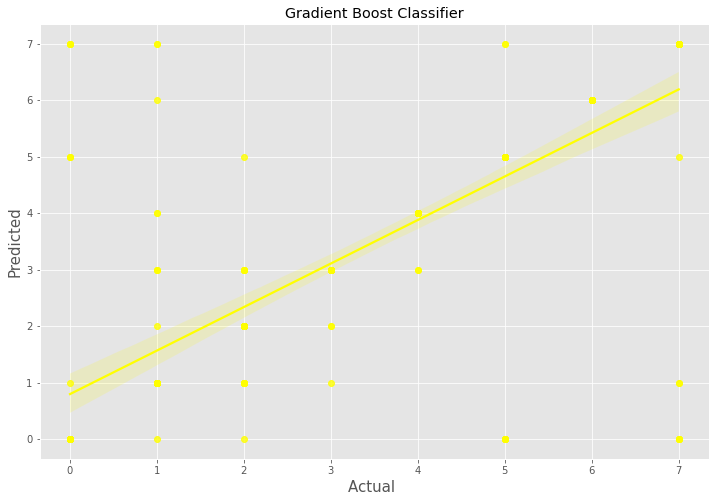

In [179]:
plt.figure(figsize=(12,8))
sns.regplot(cy_test,prediction,color='yellow')
plt.xlabel('Actual ',fontsize=15)
plt.ylabel('Predicted',fontsize=15)
plt.title("Gradient Boost Classifier")
plt.show()

# Conclusion:
### 1. Our first Model1 - Regression model shows 89.65% accuracy.
### 2. Our second Model2 - Classification model shows 86.19% accuracy.